# <h1><center>**`Credit Risk Analysis`**</center></h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path='/Users/gauravmac/Downloads/loan_data_2007_2014.csv'
LoadDataset=pd.read_csv(path)
Load_DS=LoadDataset.copy()
Load_DS.info()

/var/folders/s8/h9l9nw0s2h32gsbkdcyn3p_80000gp/T/ipykernel_1061/3039256793.py:3: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  LoadDataset=pd.read_csv(path)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

# PRE-PROCESING

In [5]:
Load_DS['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [7]:
Load_DS['emp_length_int'] = Load_DS['emp_length']

Load_DS['emp_length_int'] = Load_DS['emp_length_int'].str.replace(r'\+ years', '', regex=True)

Load_DS['emp_length_int'] = Load_DS['emp_length_int'].str.replace('< 1 year', '0')

Load_DS['emp_length_int'] = Load_DS['emp_length_int'].str.replace('n/a', '0')

Load_DS['emp_length_int'] = Load_DS['emp_length_int'].str.replace('years', '')
Load_DS['emp_length_int'] = Load_DS['emp_length_int'].str.replace('year', '')


In [9]:
type(Load_DS['emp_length_int'][0])

str

In [11]:
Load_DS['emp_length_int'] =  pd.to_numeric(Load_DS['emp_length_int'])

In [13]:
type(Load_DS['emp_length_int'][0])

numpy.float64

In [15]:
Load_DS

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,emp_length_int
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,...,NaN,NaN,NaN,NaN,NaN,29900.0,NaN,NaN,NaN,4.0
466281,466281,9684700,11536848,22000,22000,22000.0,60 months,19.97,582.50,D,...,NaN,NaN,NaN,NaN,NaN,39400.0,NaN,NaN,NaN,10.0
466282,466282,9584776,11436914,20700,20700,20700.0,60 months,16.99,514.34,D,...,NaN,NaN,NaN,NaN,NaN,13100.0,NaN,NaN,NaN,7.0
466283,466283,9604874,11457002,2000,2000,2000.0,36 months,7.90,62.59,A,...,NaN,NaN,NaN,NaN,NaN,53100.0,NaN,NaN,NaN,3.0


In [17]:
Load_DS['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [19]:
Load_DS['term_int']=Load_DS['term'].str.replace('months','')

In [21]:
type(Load_DS['term_int'][0])

str

In [23]:
Load_DS['term_int']= pd.to_numeric(Load_DS['term_int'])

In [25]:
type(Load_DS['term_int'][0])

numpy.int64

In [27]:
Load_DS['earliest_cr_line']

0         Jan-85
1         Apr-99
2         Nov-01
3         Feb-96
4         Jan-96
           ...  
466280    Apr-03
466281    Jun-97
466282    Dec-01
466283    Feb-03
466284    Feb-00
Name: earliest_cr_line, Length: 466285, dtype: object

In [29]:
Load_DS['earliest_cr_line_date']=pd.to_datetime(Load_DS['earliest_cr_line'], format='%b-%y')

In [31]:
Load_DS['earliest_cr_line']

0         Jan-85
1         Apr-99
2         Nov-01
3         Feb-96
4         Jan-96
           ...  
466280    Apr-03
466281    Jun-97
466282    Dec-01
466283    Feb-03
466284    Feb-00
Name: earliest_cr_line, Length: 466285, dtype: object

In [33]:
pd.to_datetime('2019-12-01')-Load_DS['earliest_cr_line_date']

0        12752 days
1         7549 days
2         6604 days
3         8704 days
4         8735 days
            ...    
466280    6088 days
466281    8218 days
466282    6574 days
466283    6147 days
466284    7243 days
Name: earliest_cr_line_date, Length: 466285, dtype: timedelta64[ns]

In [35]:
specific_date = pd.to_datetime('2019-12-01')
days_difference = (specific_date - Load_DS['earliest_cr_line_date']).dt.days
Load_DS['mths_since_earliest_cr_line'] = (days_difference / 30.44).round()

In [37]:
Load_DS['mths_since_earliest_cr_line'].describe()

count    466256.000000
mean        263.482430
std          93.974829
min        -588.000000
25%         207.000000
50%         249.000000
75%         309.000000
max         611.000000
Name: mths_since_earliest_cr_line, dtype: float64

In [39]:
Load_DS.loc[: , ['earliest_cr_line','earliest_cr_line_date','mths_since_earliest_cr_line']][Load_DS['mths_since_earliest_cr_line']<0]

,earliest_cr_line,earliest_cr_line_date,mths_since_earliest_cr_line
1580,Sep-62,2062-09-01,-513.0
1770,Sep-68,2068-09-01,-585.0
2799,Sep-64,2064-09-01,-537.0
3282,Sep-67,2067-09-01,-573.0
3359,Feb-65,2065-02-01,-542.0
...,...,...,...
464003,Jan-68,2068-01-01,-577.0
464260,Jul-66,2066-07-01,-559.0
465100,Oct-67,2067-10-01,-574.0
465500,Sep-67,2067-09-01,-573.0


In [41]:
Load_DS['mths_since_earliest_cr_line'][Load_DS['mths_since_earliest_cr_line'] < 0 ]=Load_DS['mths_since_earliest_cr_line'].max()

/var/folders/s8/h9l9nw0s2h32gsbkdcyn3p_80000gp/T/ipykernel_1061/1729937353.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  Load_DS['mths_since_earliest_cr_line'][Load_DS['mths_since_earliest_cr_line'] < 0 ]=Load_DS['mths_since_earliest_c

In [43]:
Load_DS['mths_since_earliest_cr_line'].describe()

count    466256.000000
mean        266.385374
std          86.460310
min          97.000000
25%         208.000000
50%         250.000000
75%         309.000000
max         611.000000
Name: mths_since_earliest_cr_line, dtype: float64

In [45]:
Load_DS['issue_d']

0         Dec-11
1         Dec-11
2         Dec-11
3         Dec-11
4         Dec-11
           ...  
466280    Jan-14
466281    Jan-14
466282    Jan-14
466283    Jan-14
466284    Jan-14
Name: issue_d, Length: 466285, dtype: object

In [47]:
Load_DS['issue_date']=pd.to_datetime(Load_DS['issue_d'], format='%b-%y')

In [49]:
pd.to_datetime('2019-12-01')-Load_DS['issue_date']

0        2922 days
1        2922 days
2        2922 days
3        2922 days
4        2922 days
            ...   
466280   2160 days
466281   2160 days
466282   2160 days
466283   2160 days
466284   2160 days
Name: issue_date, Length: 466285, dtype: timedelta64[ns]

In [51]:
specific_date = pd.to_datetime('2019-12-01')
days_difference = (specific_date - Load_DS['issue_date']).dt.days
Load_DS['mths_since_issued_date'] = (days_difference / 30.44).round()

In [53]:
Load_DS['mths_since_issued_date'].describe()

count    466285.000000
mean         75.255187
std          14.340154
min          60.000000
25%          65.000000
50%          71.000000
75%          81.000000
max         150.000000
Name: mths_since_issued_date, dtype: float64

In [55]:
Load_DS['delinq_2yrs']=Load_DS['delinq_2yrs'].astype(float)

In [57]:
Load_DS['delinq_2yrs'].describe()

count    466256.000000
mean          0.284678
std           0.797365
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          29.000000
Name: delinq_2yrs, dtype: float64

PREPROCESSING MISSING DATA

In [59]:
pd.get_dummies(Load_DS['grade'],prefix='grade',prefix_sep=':').astype(int)

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G
0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
466280,0,0,1,0,0,0,0
466281,0,0,0,1,0,0,0
466282,0,0,0,1,0,0,0
466283,1,0,0,0,0,0,0


In [61]:
Load_dumies_Data=[pd.get_dummies(Load_DS['grade'],prefix='grade',prefix_sep=':').astype(int),
                 pd.get_dummies(Load_DS['sub_grade'],prefix='sub_grade',prefix_sep=':').astype(int),
                 pd.get_dummies(Load_DS['home_ownership'],prefix='home_ownership',prefix_sep=':').astype(int),
                 pd.get_dummies(Load_DS['verification_status'],prefix='verification_status',prefix_sep=':').astype(int),
                 pd.get_dummies(Load_DS['loan_status'],prefix='loan_status',prefix_sep=':').astype(int),
                 pd.get_dummies(Load_DS['purpose'],prefix='purpose',prefix_sep=':').astype(int),
                 pd.get_dummies(Load_DS['addr_state'],prefix='addr_state',prefix_sep=':').astype(int),
                 pd.get_dummies(Load_DS['initial_list_status'],prefix='initial_list_status',prefix_sep=':').astype(int)]

In [63]:
Load_dumies_Data=pd.concat(Load_dumies_Data, axis=1)

In [65]:
Load_dumies_Data.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,sub_grade:A1,sub_grade:A2,sub_grade:A3,...,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [67]:
Load_DS=pd.concat([Load_DS,Load_dumies_Data], axis=1)

In [68]:
Load_DS.columns.values

array(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'veri

MISSING VALUES

In [71]:
Load_DS.isnull()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
466281,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
466282,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
466283,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [73]:
pd.options.display.max_rows= None

In [75]:
Load_DS.isnull().sum()

Unnamed: 0                                                              0
id                                                                      0
member_id                                                               0
loan_amnt                                                               0
funded_amnt                                                             0
funded_amnt_inv                                                         0
term                                                                    0
int_rate                                                                0
installment                                                             0
grade                                                                   0
sub_grade                                                               0
emp_title                                                           27588
emp_length                                                          21008
home_ownership                        

In [77]:
pd.options.display.max_rows =100

In [79]:
Load_DS['total_rev_hi_lim'].fillna(Load_DS['funded_amnt'],inplace=True)

/var/folders/s8/h9l9nw0s2h32gsbkdcyn3p_80000gp/T/ipykernel_1061/2438474966.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Load_DS['total_rev_hi_lim'].fillna(Load_DS['funded_amnt'],inplace=True)


In [81]:
Load_DS['total_rev_hi_lim'].isnull().sum()

0

In [83]:
Load_DS['annual_inc'].fillna(Load_DS['annual_inc'].mean(),inplace=True)

/var/folders/s8/h9l9nw0s2h32gsbkdcyn3p_80000gp/T/ipykernel_1061/2641085759.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Load_DS['annual_inc'].fillna(Load_DS['annual_inc'].mean(),inplace=True)


In [85]:
Load_DS['annual_inc'].isnull().sum()

0

In [87]:
Load_DS['mths_since_earliest_cr_line'].fillna('0',inplace=True)

/var/folders/s8/h9l9nw0s2h32gsbkdcyn3p_80000gp/T/ipykernel_1061/2050860734.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Load_DS['mths_since_earliest_cr_line'].fillna('0',inplace=True)
/var/folders/s8/h9l9nw0s2h32gsbkdcyn3p_80000gp/T/ipykernel_1061/2050860734.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  Load_DS['mths_since_earliest_cr_line'

In [89]:
Load_DS['mths_since_earliest_cr_line'].isnull().sum()

0

In [91]:
Load_DS['acc_now_delinq'].fillna('0',inplace=True)

/var/folders/s8/h9l9nw0s2h32gsbkdcyn3p_80000gp/T/ipykernel_1061/2115738278.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Load_DS['acc_now_delinq'].fillna('0',inplace=True)
/var/folders/s8/h9l9nw0s2h32gsbkdcyn3p_80000gp/T/ipykernel_1061/2115738278.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  Load_DS['acc_now_delinq'].fillna('0',inplace=True)

In [93]:
Load_DS['acc_now_delinq'].isnull().sum()


0

In [95]:
Load_DS['total_acc'].fillna('0',inplace=True)

/var/folders/s8/h9l9nw0s2h32gsbkdcyn3p_80000gp/T/ipykernel_1061/614313210.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Load_DS['total_acc'].fillna('0',inplace=True)
/var/folders/s8/h9l9nw0s2h32gsbkdcyn3p_80000gp/T/ipykernel_1061/614313210.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  Load_DS['total_acc'].fillna('0',inplace=True)


In [97]:
Load_DS['pub_rec'].fillna('0',inplace=True)
Load_DS['open_acc'].fillna('0',inplace=True)
Load_DS['inq_last_6mths'].fillna('0',inplace=True)
Load_DS['delinq_2yrs'].fillna('0',inplace=True)
Load_DS['emp_length_int'].fillna('0',inplace=True)

/var/folders/s8/h9l9nw0s2h32gsbkdcyn3p_80000gp/T/ipykernel_1061/2762947855.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Load_DS['pub_rec'].fillna('0',inplace=True)
/var/folders/s8/h9l9nw0s2h32gsbkdcyn3p_80000gp/T/ipykernel_1061/2762947855.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  Load_DS['pub_rec'].fillna('0',inplace=True)
/var/folders/

PD(PROBABLITY OF DEFAULT)

Building the Weight of expetency values

In [100]:
Load_DS['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [102]:
Load_DS['loan_status'].value_counts()

loan_status
Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: count, dtype: int64

In [104]:
Load_DS['loan_status'].value_counts()/Load_DS['loan_status'].count()

loan_status
Current                                                0.480878
Fully Paid                                             0.396193
Charged Off                                            0.091092
Late (31-120 days)                                     0.014798
In Grace Period                                        0.006747
Does not meet the credit policy. Status:Fully Paid     0.004263
Late (16-30 days)                                      0.002612
Default                                                0.001784
Does not meet the credit policy. Status:Charged Off    0.001632
Name: count, dtype: float64

In [106]:
Load_DS['good_bad']=np.where(Load_DS['loan_status'].isin(['Charged Off','Default','Does not meet the credit policy. Status:Charged Off','Late (31-120 days)']),0,1)

In [108]:
Load_DS['good_bad']

0         1
1         0
2         1
3         1
4         1
         ..
466280    1
466281    0
466282    1
466283    1
466284    1
Name: good_bad, Length: 466285, dtype: int64

In [110]:
from sklearn.model_selection import train_test_split

In [120]:
load_ds_input_train,load_ds_input_test,load_ds_targets_train,load_ds_targets_test=train_test_split(Load_DS.drop('good_bad', axis = 1), Load_DS['good_bad'],test_size=0.25,random_state=42)

In [122]:
load_ds_input_train.shape

(349713, 207)

In [124]:
load_ds_targets_train.shape

(349713,)

### DATA PREPARATION

In [126]:
df_inputs_prepr = load_ds_input_train
df_targets_prepr = load_ds_targets_train

In [128]:
df_inputs_prepr['grade'].unique()

array(['C', 'B', 'D', 'E', 'A', 'F', 'G'], dtype=object)

In [130]:
df1= pd.concat([df_inputs_prepr['grade'], df_targets_prepr],axis=1)
df1.head()

,grade,good_bad
462574,C,1
199825,B,1
259957,D,1
176933,B,1
298,B,1


In [132]:
df1.groupby(df1.columns.values[0],as_index=False)[df1.columns.values[1]].count()

,grade,good_bad
0,A,56081
1,B,102788
2,C,94003
3,D,57678
4,E,26790
5,F,9900
6,G,2473


In [134]:
df1.groupby(df1.columns.values[0],as_index=False)[df1.columns.values[1]].mean()

,grade,good_bad
0,A,0.961181
1,B,0.920983
2,C,0.885674
3,D,0.846441
4,E,0.805972
5,F,0.754040
6,G,0.724222


In [136]:
df1=pd.concat([df1.groupby(df1.columns.values[0],as_index=False)[df1.columns.values[1]].count(),
             df1.groupby(df1.columns.values[0],as_index=False)[df1.columns.values[1]].mean()],axis=1)

In [138]:
df1

,grade,good_bad,grade,good_bad
0,A,56081,A,0.961181
1,B,102788,B,0.920983
2,C,94003,C,0.885674
3,D,57678,D,0.846441
4,E,26790,E,0.805972
5,F,9900,F,0.754040
6,G,2473,G,0.724222


In [140]:
df1=df1.iloc[:,[0,1,3]]

In [142]:
df1

,grade,good_bad,good_bad
0,A,56081,0.961181
1,B,102788,0.920983
2,C,94003,0.885674
3,D,57678,0.846441
4,E,26790,0.805972
5,F,9900,0.754040
6,G,2473,0.724222


In [144]:
df1.columns=[df1.columns.values[0],'n_obs','prop_good']

In [146]:
df1

,grade,n_obs,prop_good
0,A,56081,0.961181
1,B,102788,0.920983
2,C,94003,0.885674
3,D,57678,0.846441
4,E,26790,0.805972
5,F,9900,0.754040
6,G,2473,0.724222


In [148]:
df1['prop_n_obs']=df1['n_obs']/df1['n_obs'].sum()

In [150]:
df1

,grade,n_obs,prop_good,prop_n_obs
0,A,56081,0.961181,0.160363
1,B,102788,0.920983,0.293921
2,C,94003,0.885674,0.268800
3,D,57678,0.846441,0.164930
4,E,26790,0.805972,0.076606
5,F,9900,0.754040,0.028309
6,G,2473,0.724222,0.007072


In [152]:
df1['n_good']=df1['prop_good']*df1['n_obs']
df1['n_bad']=(1-df1['prop_good'])*df1['n_obs']
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad
0,A,56081,0.961181,0.160363,53904.0,2177.0
1,B,102788,0.920983,0.293921,94666.0,8122.0
2,C,94003,0.885674,0.268800,83256.0,10747.0
3,D,57678,0.846441,0.164930,48821.0,8857.0
4,E,26790,0.805972,0.076606,21592.0,5198.0
5,F,9900,0.754040,0.028309,7465.0,2435.0
6,G,2473,0.724222,0.007072,1791.0,682.0


In [154]:
df1['prop_n_good']=df1['n_good']/df1['n_good'].sum()
df1['prop_n_bad']=df1['n_bad']/df1['n_bad'].sum()
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad
0,A,56081,0.961181,0.160363,53904.0,2177.0,0.173049,0.056963
1,B,102788,0.920983,0.293921,94666.0,8122.0,0.303909,0.212518
2,C,94003,0.885674,0.268800,83256.0,10747.0,0.267279,0.281203
3,D,57678,0.846441,0.164930,48821.0,8857.0,0.156731,0.231749
4,E,26790,0.805972,0.076606,21592.0,5198.0,0.069317,0.136009
5,F,9900,0.754040,0.028309,7465.0,2435.0,0.023965,0.063713
6,G,2473,0.724222,0.007072,1791.0,682.0,0.005750,0.017845


In [156]:
df1['WoE']=np.log(df1['prop_n_good']/df1['prop_n_bad'])
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE
0,A,56081,0.961181,0.160363,53904.0,2177.0,0.173049,0.056963,1.111180
1,B,102788,0.920983,0.293921,94666.0,8122.0,0.303909,0.212518,0.357702
2,C,94003,0.885674,0.268800,83256.0,10747.0,0.267279,0.281203,-0.050783
3,D,57678,0.846441,0.164930,48821.0,8857.0,0.156731,0.231749,-0.391124
4,E,26790,0.805972,0.076606,21592.0,5198.0,0.069317,0.136009,-0.674028
5,F,9900,0.754040,0.028309,7465.0,2435.0,0.023965,0.063713,-0.977798
6,G,2473,0.724222,0.007072,1791.0,682.0,0.005750,0.017845,-1.132577


In [158]:
df1= df1.sort_values(['WoE'])
df1=df1.reset_index(drop=True)
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE
0,G,2473,0.724222,0.007072,1791.0,682.0,0.005750,0.017845,-1.132577
1,F,9900,0.754040,0.028309,7465.0,2435.0,0.023965,0.063713,-0.977798
2,E,26790,0.805972,0.076606,21592.0,5198.0,0.069317,0.136009,-0.674028
3,D,57678,0.846441,0.164930,48821.0,8857.0,0.156731,0.231749,-0.391124
4,C,94003,0.885674,0.268800,83256.0,10747.0,0.267279,0.281203,-0.050783
5,B,102788,0.920983,0.293921,94666.0,8122.0,0.303909,0.212518,0.357702
6,A,56081,0.961181,0.160363,53904.0,2177.0,0.173049,0.056963,1.111180


In [164]:
df1['diff_prop_good'] = df1['prop_good'].diff().abs()
df1['diff_WoE']=df1['WoE'].diff().abs()

In [166]:
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE
0,G,2473,0.724222,0.007072,1791.0,682.0,0.005750,0.017845,-1.132577,NaN,NaN
1,F,9900,0.754040,0.028309,7465.0,2435.0,0.023965,0.063713,-0.977798,0.029819,0.154779
2,E,26790,0.805972,0.076606,21592.0,5198.0,0.069317,0.136009,-0.674028,0.051932,0.303770
3,D,57678,0.846441,0.164930,48821.0,8857.0,0.156731,0.231749,-0.391124,0.040468,0.282904
4,C,94003,0.885674,0.268800,83256.0,10747.0,0.267279,0.281203,-0.050783,0.039233,0.340341
5,B,102788,0.920983,0.293921,94666.0,8122.0,0.303909,0.212518,0.357702,0.035309,0.408485
6,A,56081,0.961181,0.160363,53904.0,2177.0,0.173049,0.056963,1.111180,0.040198,0.753478


In [168]:
df1['IV'] = df1['prop_n_good'] - df1['prop_n_bad']*df1['WoE']
df1['IV']=df1['IV'].sum()
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,G,2473,0.724222,0.007072,1791.0,682.0,0.005750,0.017845,-1.132577,NaN,NaN,1.139793
1,F,9900,0.754040,0.028309,7465.0,2435.0,0.023965,0.063713,-0.977798,0.029819,0.154779,1.139793
2,E,26790,0.805972,0.076606,21592.0,5198.0,0.069317,0.136009,-0.674028,0.051932,0.303770,1.139793
3,D,57678,0.846441,0.164930,48821.0,8857.0,0.156731,0.231749,-0.391124,0.040468,0.282904,1.139793
4,C,94003,0.885674,0.268800,83256.0,10747.0,0.267279,0.281203,-0.050783,0.039233,0.340341,1.139793
5,B,102788,0.920983,0.293921,94666.0,8122.0,0.303909,0.212518,0.357702,0.035309,0.408485,1.139793
6,A,56081,0.961181,0.160363,53904.0,2177.0,0.173049,0.056963,1.111180,0.040198,0.753478,1.139793


In [170]:
def woe_discrete(df,discrete_variable_name,good_bad_variable_df):
    df = pd.concat([df[discrete_variable_name],good_bad_variable_df], axis=1)
    df = pd.concat([df.groupby(df.columns.values[0],as_index = False)[df.columns.values[1]].count(),
                   df.groupby(df.columns.values[0],as_index = False)[df.columns.values[1]].mean()],axis=1)
    df= df.iloc[:,[0,1,3]]
    df.columns=[df1.columns.values[0],'n_obs','prop_good']
    df['prop_n_obs']=df['n_obs']/df['n_obs'].sum()
    df['n_good']=df['prop_good']*df['n_obs']
    df['n_bad']=(1-df['prop_good'])*df['n_obs']
    df['prop_n_good']=df['n_good']/df['n_good'].sum()
    df['prop_n_bad']=df['n_bad']/df['n_good'].sum()
    df['WoE']=np.log(df['prop_n_good']/df['prop_n_bad'])
    df= df.sort_values(['WoE'])
    df=df.reset_index(drop=True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE']=df['WoE'].diff().abs()
    df['IV'] = df['prop_n_good'] - df['prop_n_bad']*df['WoE']
    df['IV']=df['IV'].sum()
    return df

In [172]:
df_temp = woe_discrete(df_inputs_prepr, 'grade', df_targets_prepr)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,G,2473,0.724222,0.007072,1791.0,682.0,0.005750,0.002189,0.965500,NaN,NaN,0.759734
1,F,9900,0.754040,0.028309,7465.0,2435.0,0.023965,0.007817,1.120279,0.029819,0.154779,0.759734
2,E,26790,0.805972,0.076606,21592.0,5198.0,0.069317,0.016687,1.424049,0.051932,0.303770,0.759734
3,D,57678,0.846441,0.164930,48821.0,8857.0,0.156731,0.028434,1.706952,0.040468,0.282904,0.759734
4,C,94003,0.885674,0.268800,83256.0,10747.0,0.267279,0.034501,2.047294,0.039233,0.340341,0.759734
5,B,102788,0.920983,0.293921,94666.0,8122.0,0.303909,0.026074,2.455778,0.035309,0.408485,0.759734
6,A,56081,0.961181,0.160363,53904.0,2177.0,0.173049,0.006989,3.209257,0.040198,0.753478,0.759734


PROCESSING DISCRETE VARIABLES:VISUALIZING RESULTS

In [174]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [176]:
def plot_by_woe(df_WoE,rotation_of_x_axis_labels=0):
    x=np.array(df_WoE.iloc[:,0].apply(str))
    y=df_WoE['WoE']
    plt.figure(figsize=(18,6))
    plt.plot(x,y,marker = 'o',linestyle='--',color='k')
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('weight of evidence')
    plt.title(str('Weight of Evidence by ')+df_WoE.columns[0])
    plt.xticks(rotation=rotation_of_x_axis_labels)

**High WoE means the borrower chance to pay the loan on time is high:**

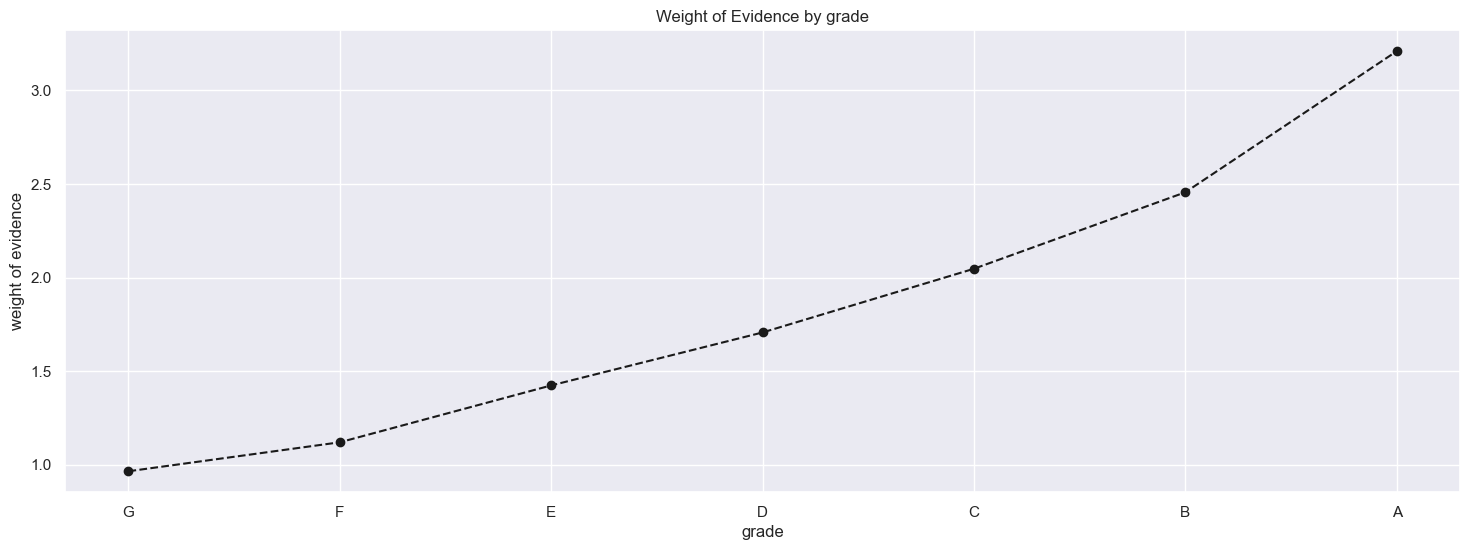

In [178]:
plot_by_woe(df_temp)

Preprocessing Discrete Variables:Creating Dummy Variable,part1

In [180]:
df_temp1 = woe_discrete(df_inputs_prepr, 'home_ownership', df_targets_prepr)
df_temp1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,OTHER,129,0.798450,0.000369,103.0,26.0,0.000331,0.000083,1.376632,NaN,NaN,0.743915
1,NONE,37,0.837838,0.000106,31.0,6.0,0.000100,0.000019,1.642228,0.039388,0.265595,0.743915
2,RENT,141168,0.873810,0.403668,123354.0,17814.0,0.396006,0.057189,1.935074,0.035972,0.292846,0.743915
3,OWN,31216,0.892619,0.089262,27864.0,3352.0,0.089452,0.010761,2.117778,0.018809,0.182705,0.743915
4,MORTGAGE,177163,0.903930,0.506595,160143.0,17020.0,0.514111,0.054640,2.241678,0.011311,0.123900,0.743915


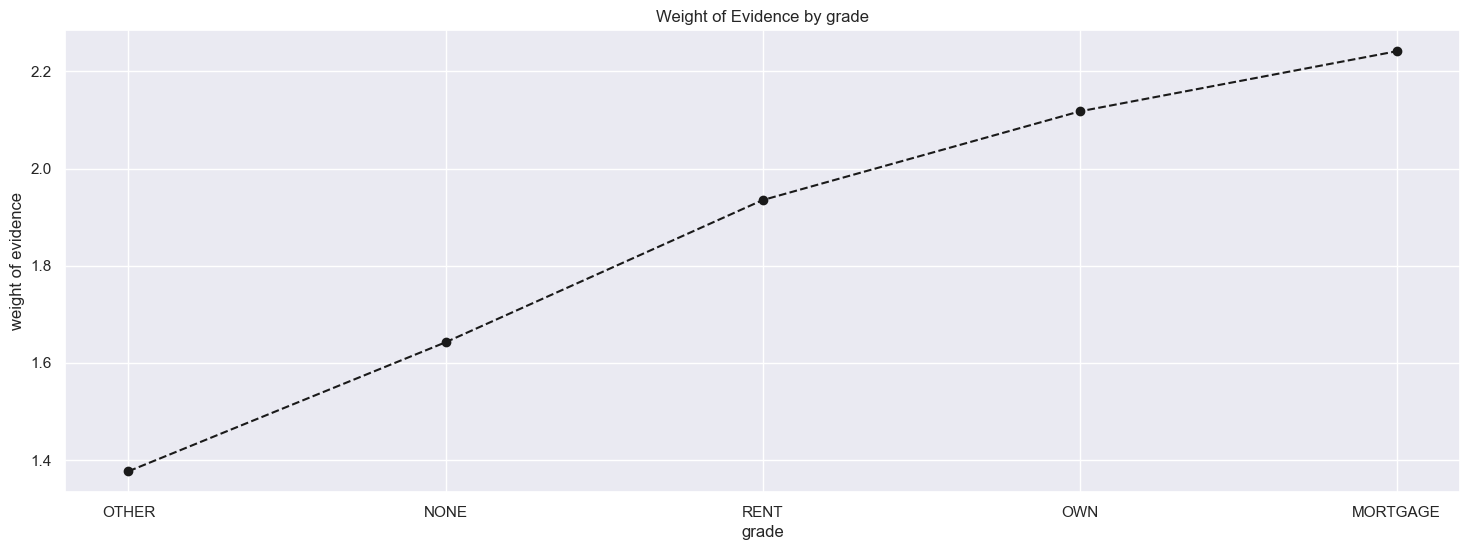

In [182]:
plot_by_woe(df_temp1)

In [184]:
df_inputs_prepr['home_ownership:RENT_OTHER_NONE_ANY'] = sum([df_inputs_prepr['home_ownership:RENT'],df_inputs_prepr['home_ownership:OTHER'],
                                                           df_inputs_prepr['home_ownership:NONE'],df_inputs_prepr['home_ownership:ANY']])

PREPROCESSING DISCRETE VARRIABLES:DUMMMY VARRIABLES

In [186]:
df_inputs_prepr['addr_state'].unique()

array(['GA', 'FL', 'OH', 'NJ', 'NY', 'TN', 'CO', 'MA', 'CT', 'CA', 'MI',
       'IL', 'IN', 'WA', 'LA', 'MD', 'SC', 'NV', 'TX', 'OR', 'AR', 'HI',
       'PA', 'WI', 'RI', 'VA', 'KS', 'MN', 'WV', 'NC', 'MT', 'DE', 'MO',
       'NH', 'AL', 'MS', 'VT', 'AZ', 'KY', 'OK', 'WY', 'SD', 'UT', 'AK',
       'DC', 'NM', 'IA', 'NE', 'ID', 'ME'], dtype=object)

In [188]:
df_temp = woe_discrete(df_inputs_prepr, 'addr_state', df_targets_prepr)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,NE,13,0.461538,0.000037,6.0,7.0,0.000019,0.000022,-0.154151,NaN,NaN,0.743296
1,IA,13,0.769231,0.000037,10.0,3.0,0.000032,0.000010,1.203973,0.307692,1.358123,0.743296
2,NV,4930,0.864909,0.014097,4264.0,666.0,0.013689,0.002138,1.856673,0.095678,0.652700,0.743296
3,FL,23618,0.875180,0.067535,20670.0,2948.0,0.066357,0.009464,1.947556,0.010271,0.090883,0.743296
4,AL,4371,0.875772,0.012499,3828.0,543.0,0.012289,0.001743,1.952988,0.000592,0.005432,0.743296
5,HI,1879,0.877594,0.005373,1649.0,230.0,0.005294,0.000738,1.969845,0.001822,0.016857,0.743296
6,NM,1916,0.881002,0.005479,1688.0,228.0,0.005419,0.000732,2.001954,0.003408,0.032109,0.743296
7,TN,4537,0.883624,0.012973,4009.0,528.0,0.012870,0.001695,2.027201,0.002621,0.025247,0.743296
8,OK,3046,0.883782,0.008710,2692.0,354.0,0.008642,0.001136,2.028743,0.000158,0.001542,0.743296
9,VA,10616,0.883949,0.030356,9384.0,1232.0,0.030126,0.003955,2.030367,0.000167,0.001624,0.743296


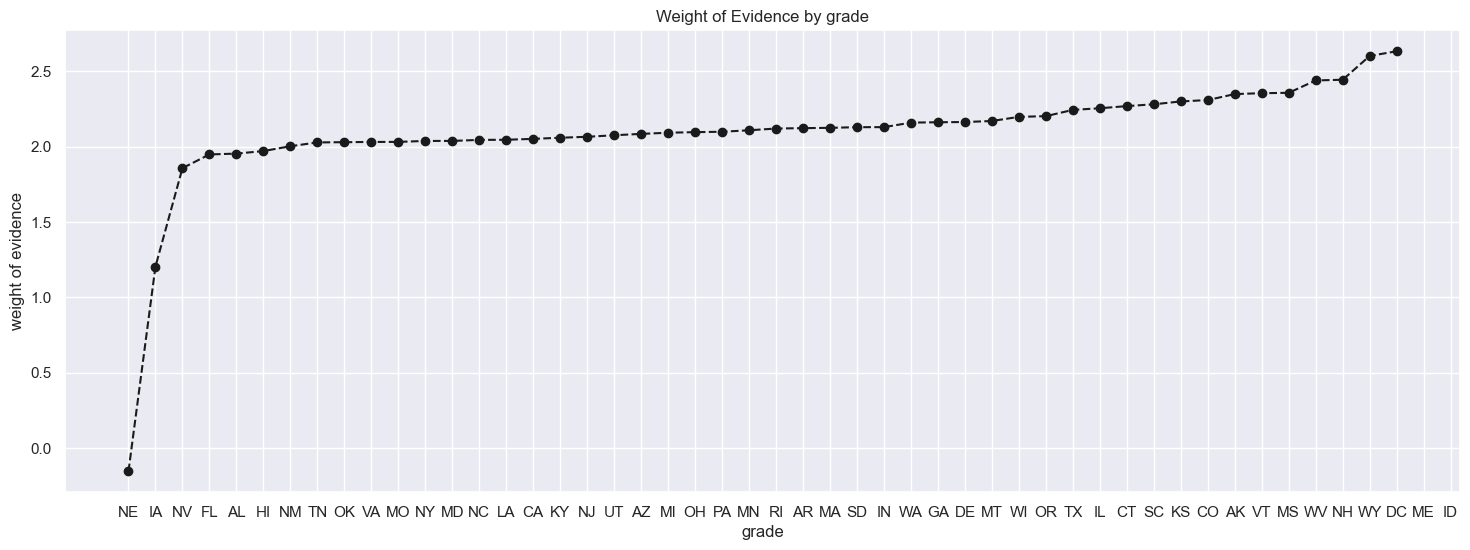

In [190]:
plot_by_woe(df_temp)

In [192]:
if['addr_state:ND'] in df_inputs_prepr.columns.values:
    pass
else:
    df_inputs_prepr['addr_state:ND']=0

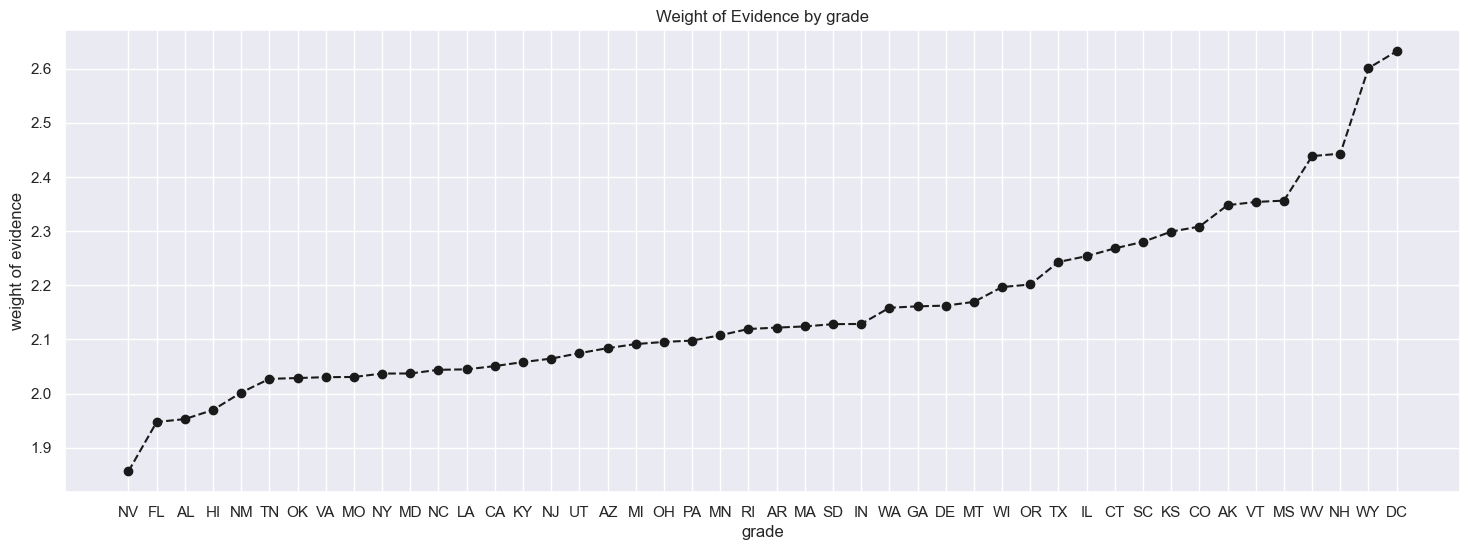

In [194]:
plot_by_woe(df_temp.iloc[2:-2,:])

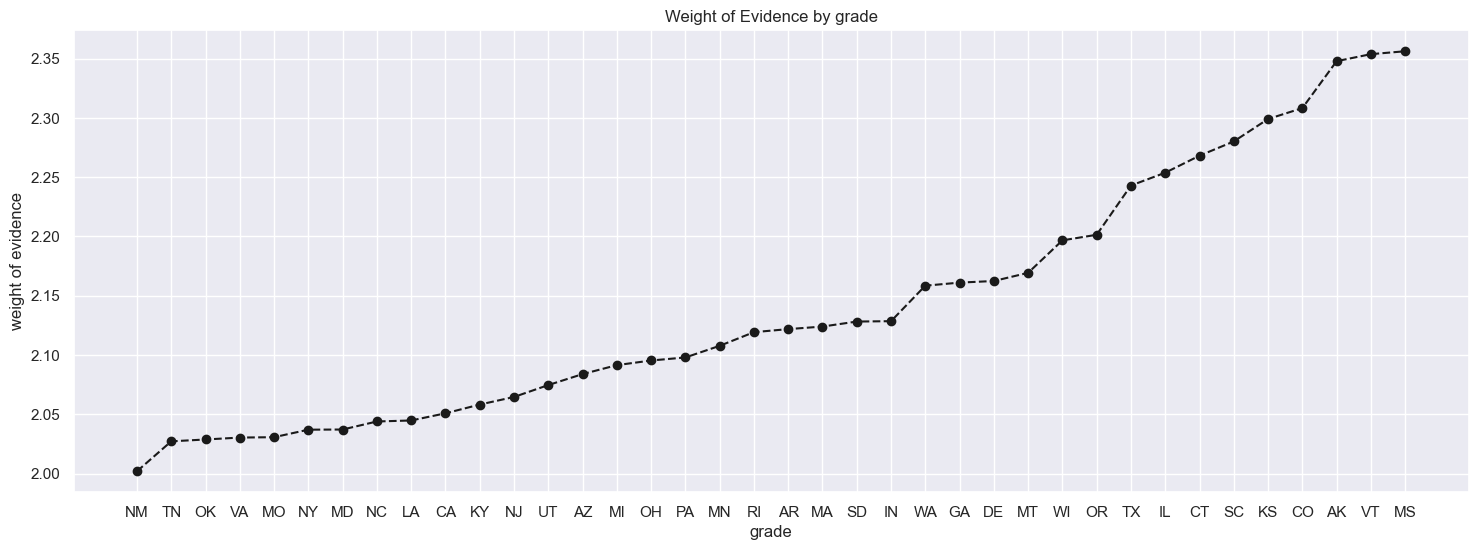

In [196]:
plot_by_woe(df_temp.iloc[6:-6,:])

In [198]:
df_inputs_prepr['addr_state:ND_NE_IA_NC_FL_HI_AL']=sum([df_inputs_prepr['addr_state:ND'],df_inputs_prepr['addr_state:IA'],
                                                       df_inputs_prepr['addr_state:NE'],df_inputs_prepr['addr_state:NC'],
                                                       df_inputs_prepr['addr_state:FL'],df_inputs_prepr['addr_state:HI'], 
                                                       df_inputs_prepr['addr_state:AL']])

df_inputs_prepr['addr_state:NM_VA']=sum([df_inputs_prepr['addr_state:NM'],df_inputs_prepr['addr_state:VA']])

df_inputs_prepr['addr_state:OK_TN_MO_LA_MD_NC']=sum([df_inputs_prepr['addr_state:OK'],df_inputs_prepr['addr_state:TN'],
                                                       df_inputs_prepr['addr_state:MO'],df_inputs_prepr['addr_state:LA'],
                                                       df_inputs_prepr['addr_state:MD'],df_inputs_prepr['addr_state:NC']])


df_inputs_prepr['addr_state:UT_KY_AZ_NJ']=sum([df_inputs_prepr['addr_state:UT'],df_inputs_prepr['addr_state:KY'],
                                                       df_inputs_prepr['addr_state:AZ'],df_inputs_prepr['addr_state:NJ']])


df_inputs_prepr['addr_state:AR_MI_PA_OH_MN']=sum([df_inputs_prepr['addr_state:AR'],df_inputs_prepr['addr_state:MI'],
                                                       df_inputs_prepr['addr_state:PA'],df_inputs_prepr['addr_state:OH'],
                                                       df_inputs_prepr['addr_state:MN']])

df_inputs_prepr['addr_state:RI_MA_DE_SD_IN']=sum([df_inputs_prepr['addr_state:RI'],df_inputs_prepr['addr_state:MA'],
                                                       df_inputs_prepr['addr_state:DE'],df_inputs_prepr['addr_state:SD'],
                                                       df_inputs_prepr['addr_state:IN']])

df_inputs_prepr['addr_state:GA_WA_OR']=sum([df_inputs_prepr['addr_state:GA'],df_inputs_prepr['addr_state:WA'],
                                                       df_inputs_prepr['addr_state:OR']])

df_inputs_prepr['addr_state:WI_MT']=sum([df_inputs_prepr['addr_state:WI'],df_inputs_prepr['addr_state:MT']])


df_inputs_prepr['addr_state:IL_CT']=sum([df_inputs_prepr['addr_state:IL'],df_inputs_prepr['addr_state:CT']])

df_inputs_prepr['addr_state:KS_SC_CO_VT_AK_MS']=sum([df_inputs_prepr['addr_state:KS'],df_inputs_prepr['addr_state:SC'],
                                                       df_inputs_prepr['addr_state:CO'],df_inputs_prepr['addr_state:VT'],
                                                       df_inputs_prepr['addr_state:AK'],df_inputs_prepr['addr_state:MS']])


df_inputs_prepr['addr_state:WV_NH_WY_DC_ME_ID']=sum([df_inputs_prepr['addr_state:WV'],df_inputs_prepr['addr_state:NH'],
                                                       df_inputs_prepr['addr_state:WY'],df_inputs_prepr['addr_state:DC'],
                                                       df_inputs_prepr['addr_state:ME'],df_inputs_prepr['addr_state:ID']])

In [200]:
df_inputs_prepr['verification_status'].unique()

array(['Verified', 'Not Verified', 'Source Verified'], dtype=object)

In [202]:
df_temp = woe_discrete(df_inputs_prepr, 'verification_status', df_targets_prepr)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,Verified,126140,0.872863,0.360696,110103.0,16037.0,0.353466,0.051484,1.926518,NaN,NaN,0.743836
1,Source Verified,112425,0.895904,0.321478,100722.0,11703.0,0.323350,0.037570,2.152519,0.023040,0.226001,0.743836
2,Not Verified,111148,0.905729,0.317826,100670.0,10478.0,0.323183,0.033638,2.262570,0.009825,0.110051,0.743836


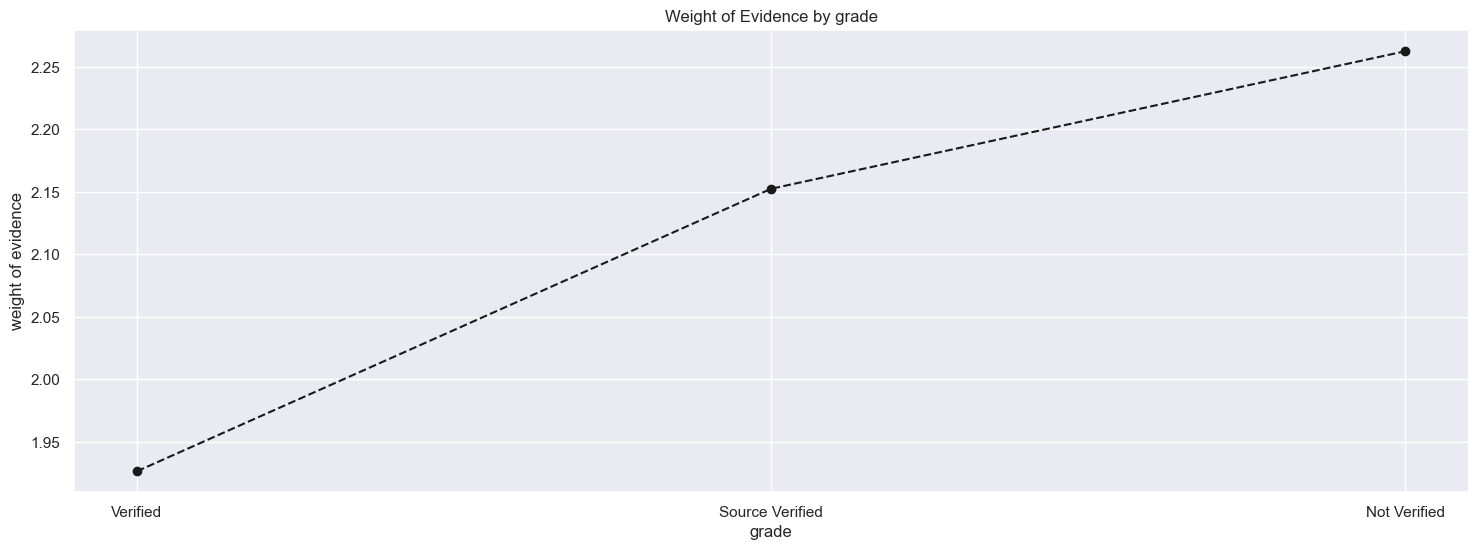

In [204]:
plot_by_woe(df_temp)

In [206]:
df_inputs_prepr['purpose'].unique()

array(['home_improvement', 'debt_consolidation', 'credit_card', 'other',
       'major_purchase', 'medical', 'small_business', 'car', 'house',
       'renewable_energy', 'moving', 'educational', 'wedding', 'vacation'],
      dtype=object)

In [208]:
df_temp = woe_discrete(df_inputs_prepr, 'purpose', df_targets_prepr)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,small_business,5242,0.786532,0.014989,4123.0,1119.0,0.013236,0.003592,1.304146,NaN,NaN,0.744825
1,educational,308,0.798701,0.000881,246.0,62.0,0.000790,0.000199,1.378197,0.012169,0.074052,0.744825
2,moving,2261,0.839452,0.006465,1898.0,363.0,0.006093,0.001165,1.654153,0.040750,0.275956,0.744825
3,house,1713,0.859895,0.004898,1473.0,240.0,0.004729,0.000770,1.814417,0.020443,0.160264,0.744825
4,other,17683,0.862410,0.050564,15250.0,2433.0,0.048957,0.007811,1.835454,0.002515,0.021037,0.744825
5,renewable_energy,271,0.863469,0.000775,234.0,37.0,0.000751,0.000119,1.844403,0.001058,0.008949,0.744825
6,medical,3445,0.868505,0.009851,2992.0,453.0,0.009605,0.001454,1.887805,0.005036,0.043402,0.744825
7,vacation,1866,0.880493,0.005336,1643.0,223.0,0.005275,0.000716,1.997107,0.011988,0.109302,0.744825
8,wedding,1760,0.882386,0.005033,1553.0,207.0,0.004986,0.000665,2.015225,0.001893,0.018118,0.744825
9,debt_consolidation,205557,0.887039,0.587788,182337.0,23220.0,0.585361,0.074544,2.060843,0.004652,0.045618,0.744825


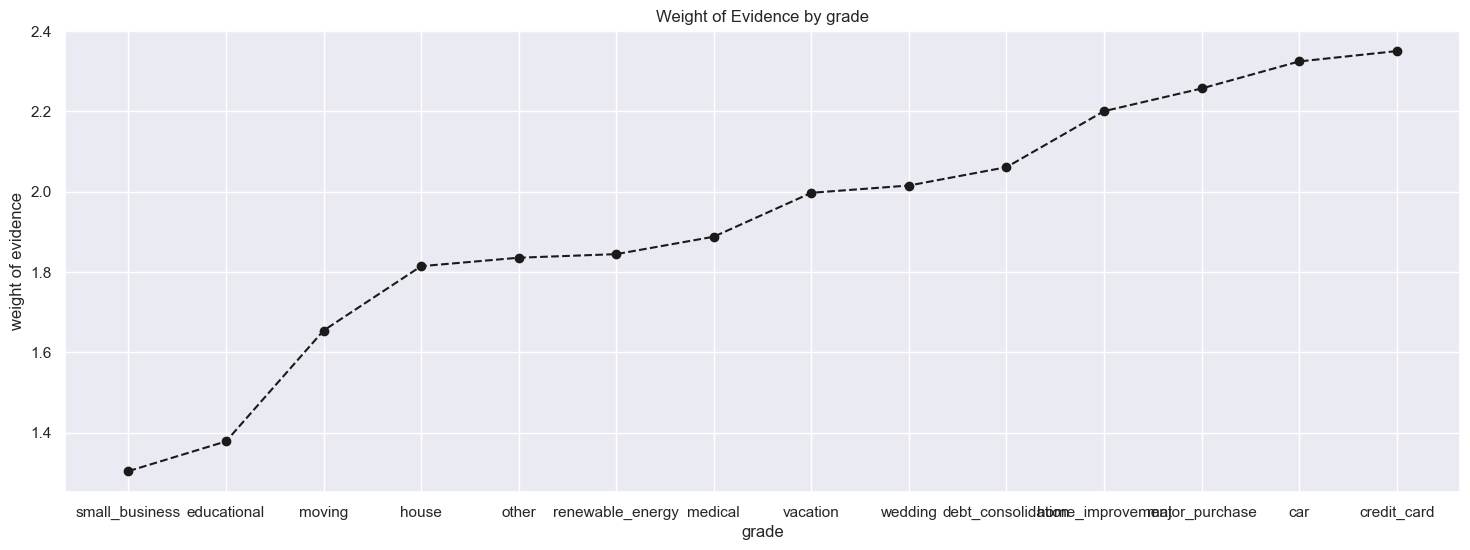

In [210]:
plot_by_woe(df_temp)

In [212]:
df_inputs_prepr['purpose:educ_sm_b_wedd_ren_en_mov_house']=sum([df_inputs_prepr['purpose:small_business'],df_inputs_prepr['purpose:educational'],
                                                               df_inputs_prepr['purpose:renewable_energy'],df_inputs_prepr['purpose:moving'],
                                  -                              df_inputs_prepr['purpose:house'],df_inputs_prepr['purpose:other'],
                                                               df_inputs_prepr['purpose:medical'],df_inputs_prepr['purpose:wedding'],
                                                               df_inputs_prepr['purpose:vacation'],df_inputs_prepr['purpose:debt_consolidation'],
                                                               df_inputs_prepr['purpose:home_improvement'],df_inputs_prepr['purpose:major_purchase'],
                                                               df_inputs_prepr['purpose:car'],df_inputs_prepr['purpose:credit_card']])

In [214]:
df_inputs_prepr['initial_list_status'].unique()

array(['f', 'w'], dtype=object)

In [216]:
df_temp = woe_discrete(df_inputs_prepr, 'initial_list_status', df_targets_prepr)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,f,227378,0.879861,0.650185,200061.0,27317.0,0.642261,0.087696,1.991113,NaN,NaN,0.744036
1,w,122335,0.910892,0.349815,111434.0,10901.0,0.357739,0.034996,2.324578,0.031031,0.333465,0.744036


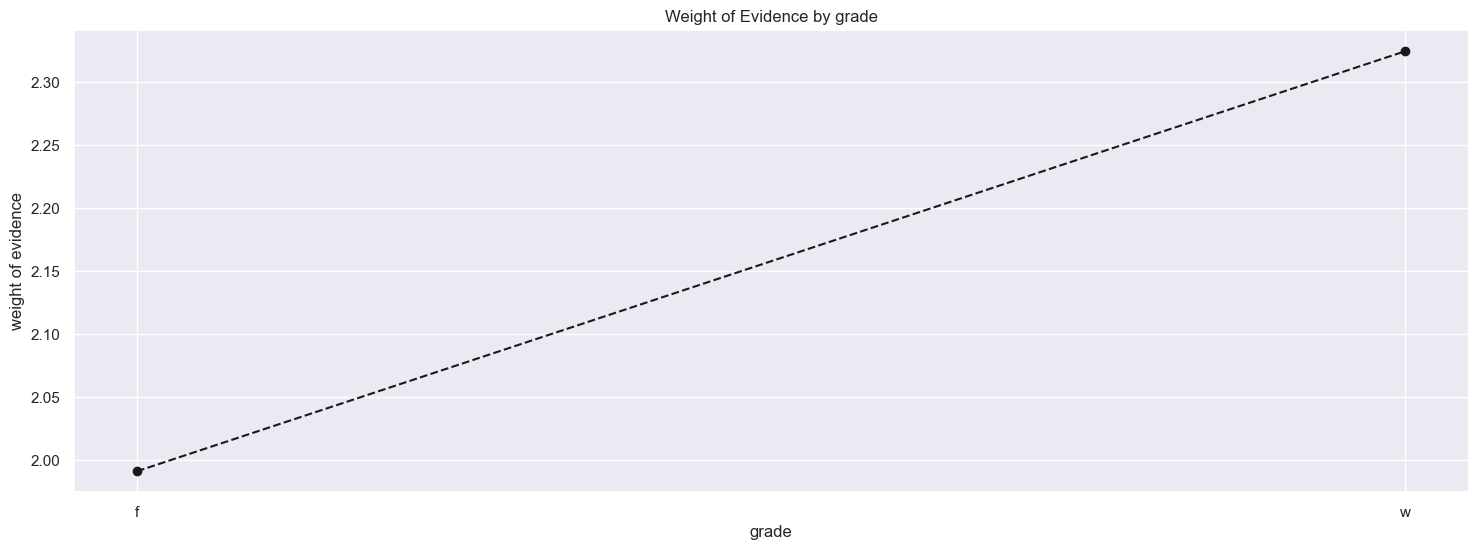

In [218]:
plot_by_woe(df_temp)

PREPROCESSING CONTINUOUS VARIABLES:AUTOMATING CALCULATIONS AND VISUALIZING RESULTS

In [220]:
def woe_continuous(df,discrete_variable_name,good_bad_variable_df):
    df = pd.concat([df[discrete_variable_name],good_bad_variable_df], axis=1)
    df = pd.concat([df.groupby(df.columns.values[0],as_index = False)[df.columns.values[1]].count(),
                   df.groupby(df.columns.values[0],as_index = False)[df.columns.values[1]].mean()],axis=1)
    df= df.iloc[:,[0,1,3]]
    df.columns=[df1.columns.values[0],'n_obs','prop_good']
    df['prop_n_obs']=df['n_obs']/df['n_obs'].sum()
    df['n_good']=df['prop_good']*df['n_obs']
    df['n_bad']=(1-df['prop_good'])*df['n_obs']
    df['prop_n_good']=df['n_good']/df['n_good'].sum()
    df['prop_n_bad']=df['n_bad']/df['n_good'].sum()
    df['WoE']=np.log(df['prop_n_good']/df['prop_n_bad'])
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE']=df['WoE'].diff().abs()
    df['IV'] = df['prop_n_good'] - df['prop_n_bad']*df['WoE']
    df['IV']=df['IV'].sum()
    return df

PREPROCESSING CONTNUOUS VARIABLES:CREATING DUMMY VARIABLES

In [222]:
df_inputs_prepr['term_int'].unique()

array([60, 36])

In [224]:
df_temp = woe_continuous(df_inputs_prepr, 'term_int', df_targets_prepr)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,36,253583,0.903049,0.725117,228998.0,24585.0,0.735158,0.078926,2.231577,NaN,NaN,0.74508
1,60,96130,0.858182,0.274883,82497.0,13633.0,0.264842,0.043766,1.800269,0.044868,0.431308,0.74508


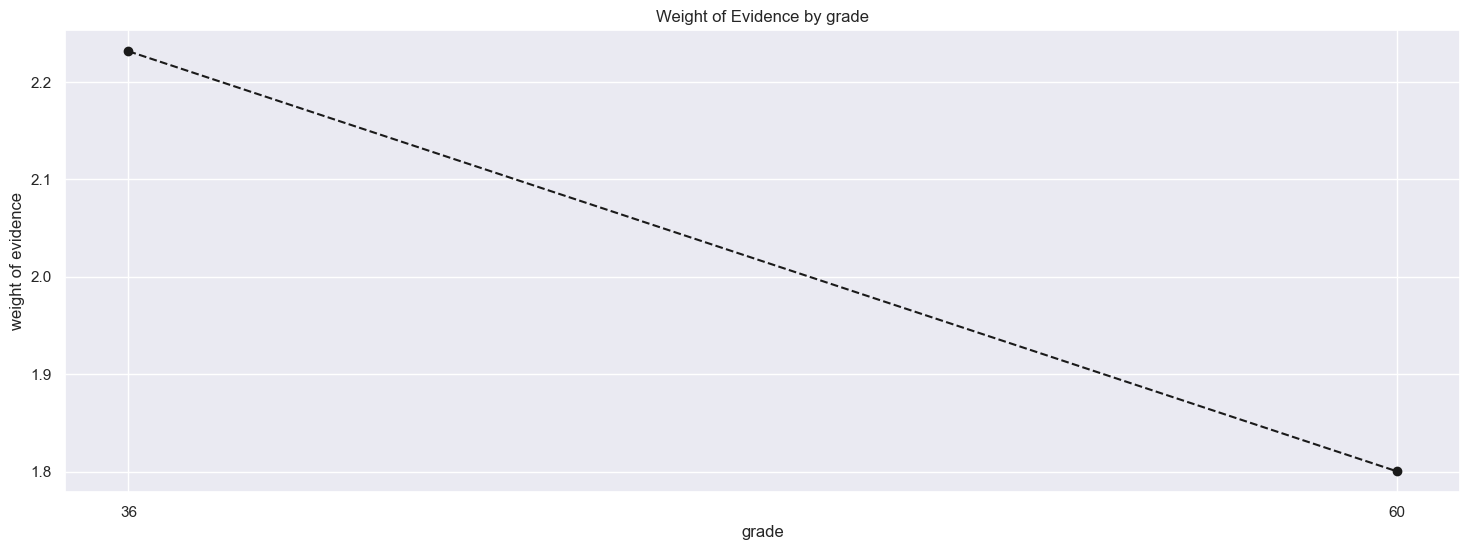

In [226]:
plot_by_woe(df_temp)

In [228]:
df_inputs_prepr['term:36']=np.where((df_inputs_prepr['term_int'] ==36),1,0)
df_inputs_prepr['term:60']=np.where((df_inputs_prepr['term_int']==60),1,0)

In [230]:
df_inputs_prepr['emp_length_int'].unique()

array([10.0, 5.0, 0.0, 1.0, 8.0, 7.0, 9.0, 4.0, 3.0, 6.0, 2.0, '0'],
      dtype=object)

In [232]:
df_temp = woe_continuous(df_inputs_prepr, 'emp_length_int', df_targets_prepr)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,27116,0.880993,0.077538,23889.0,3227.0,0.076691,0.010360,2.001865,NaN,NaN,0.743027
1,1.0,22210,0.887393,0.063509,19709.0,2501.0,0.063272,0.008029,2.064385,0.006400,0.062520,0.743027
2,2.0,31059,0.891368,0.088813,27685.0,3374.0,0.088878,0.010832,2.104792,0.003975,0.040407,0.743027
3,3.0,27341,0.891043,0.078181,24362.0,2979.0,0.078210,0.009564,2.101437,0.000325,0.003355,0.743027
4,4.0,21052,0.890794,0.060198,18753.0,2299.0,0.060203,0.007381,2.098879,0.000249,0.002557,0.743027
5,5.0,23061,0.885478,0.065943,20420.0,2641.0,0.065555,0.008478,2.045357,0.005317,0.053522,0.743027
6,6.0,19586,0.883743,0.056006,17309.0,2277.0,0.055568,0.007310,2.028368,0.001734,0.016989,0.743027
7,7.0,19741,0.887442,0.056449,17519.0,2222.0,0.056242,0.007133,2.064878,0.003699,0.036511,0.743027
8,8.0,16744,0.890349,0.047879,14908.0,1836.0,0.047860,0.005894,2.094309,0.002906,0.029430,0.743027
9,9.0,13340,0.887256,0.038146,11836.0,1504.0,0.037997,0.004828,2.063018,0.003092,0.031291,0.743027


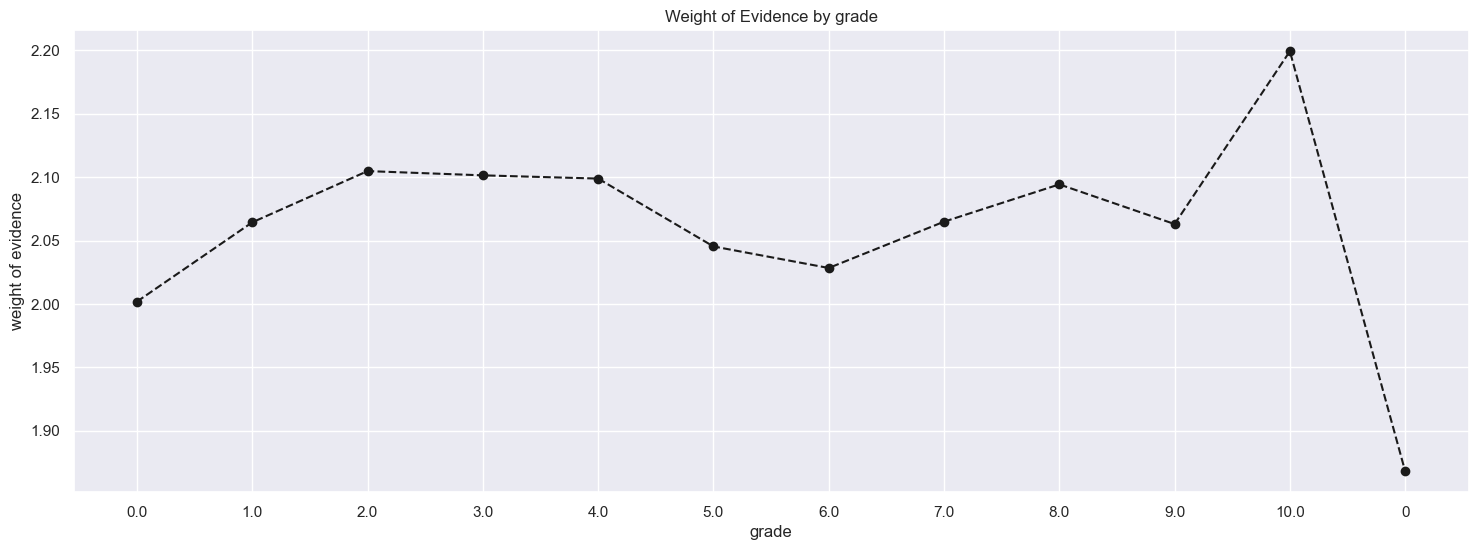

In [234]:
plot_by_woe(df_temp)

In [236]:
df_inputs_prepr['emp_length:0']=np.where(df_inputs_prepr['emp_length_int'].isin([0]),1,0)
df_inputs_prepr['emp_length:1']=np.where(df_inputs_prepr['emp_length_int'].isin([1]),1,0)
df_inputs_prepr['emp_length:2-4']=np.where(df_inputs_prepr['emp_length_int'].isin(range(2,5)),1,0)
df_inputs_prepr['emp_length:5-6']=np.where(df_inputs_prepr['emp_length_int'].isin(range(5,7)),1,0)
df_inputs_prepr['emp_length:7-9']=np.where(df_inputs_prepr['emp_length_int'].isin(range(7,10)),1,0)
df_inputs_prepr['emp_length:10']=np.where(df_inputs_prepr['emp_length_int'].isin([10]),1,0)

In [238]:
df_inputs_prepr['mths_since_issued_date'].unique()

array([ 71.,  87.,  61.,  83.,  96.,  98.,  77.,  67.,  62.,  91.,  68.,
        76.,  80.,  85.,  60.,  65.,  64., 101.,  92.,  66.,  70.,  63.,
       102., 116.,  95.,  86.,  84., 106.,  88.,  73.,  75.,  79., 118.,
        69.,  97., 121.,  72., 115.,  90., 132.,  78.,  82.,  74., 109.,
        81.,  93., 100., 110., 127.,  89., 130., 104.,  94., 123., 117.,
       108.,  99., 113., 103., 105., 114., 111., 140., 141., 142., 120.,
       112., 107., 133., 128., 119., 122., 138., 125., 136., 124., 149.,
       131., 145., 129., 143., 139., 148., 126., 144., 146., 137., 135.,
       134., 147., 150.])

In [240]:
df_inputs_prepr['mths_since_issued_date_factor']=pd.cut(df_inputs_prepr['mths_since_issued_date'],50)

In [242]:
df_inputs_prepr['mths_since_issued_date_factor']

462574     (70.8, 72.6]
199825     (85.2, 87.0]
259957    (59.91, 61.8]
176933     (81.6, 83.4]
298        (94.2, 96.0]
              ...      
259178    (59.91, 61.8]
365838     (65.4, 67.2]
131932     (76.2, 78.0]
146867     (79.8, 81.6]
121958     (76.2, 78.0]
Name: mths_since_issued_date_factor, Length: 349713, dtype: category
Categories (50, interval[float64, right]): [(59.91, 61.8] < (61.8, 63.6] < (63.6, 65.4] < (65.4, 67.2] ... (142.8, 144.6] < (144.6, 146.4] < (146.4, 148.2] < (148.2, 150.0]]

In [244]:
df_temp=woe_continuous(df_inputs_prepr,'mths_since_issued_date_factor',df_targets_prepr)
df_temp

/var/folders/s8/h9l9nw0s2h32gsbkdcyn3p_80000gp/T/ipykernel_1061/625061358.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0],as_index = False)[df.columns.values[1]].count(),
/var/folders/s8/h9l9nw0s2h32gsbkdcyn3p_80000gp/T/ipykernel_1061/625061358.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0],as_index = False)[df.columns.values[1]].mean()],axis=1)


,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(59.91, 61.8]",26445,0.942144,0.075619,24915.0,1530.0,0.079985,0.004912,2.790202,NaN,NaN,0.749415
1,"(61.8, 63.6]",37231,0.928715,0.106462,34577.0,2654.0,0.111003,0.008520,2.567121,0.013429,0.223082,0.749415
2,"(63.6, 65.4]",36192,0.916832,0.103491,33182.0,3010.0,0.106525,0.009663,2.400067,0.011883,0.167053,0.749415
3,"(65.4, 67.2]",27169,0.908756,0.077689,24690.0,2479.0,0.079263,0.007958,2.298543,0.008076,0.101524,0.749415
4,"(67.2, 69.0]",26535,0.900810,0.075877,23903.0,2632.0,0.076736,0.008450,2.206260,0.007946,0.092283,0.749415
5,"(69.0, 70.8]",11406,0.899527,0.032615,10260.0,1146.0,0.032938,0.003679,2.191975,0.001284,0.014285,0.749415
6,"(70.8, 72.6]",22901,0.899393,0.065485,20597.0,2304.0,0.066123,0.007397,2.190499,0.000134,0.001477,0.749415
7,"(72.6, 74.4]",21511,0.888150,0.061510,19105.0,2406.0,0.061333,0.007724,2.071984,0.011243,0.118514,0.749415
8,"(74.4, 76.2]",19362,0.881366,0.055365,17065.0,2297.0,0.054784,0.007374,2.005426,0.006785,0.066559,0.749415
9,"(76.2, 78.0]",17176,0.866616,0.049115,14885.0,2291.0,0.047786,0.007355,1.871366,0.014749,0.134060,0.749415


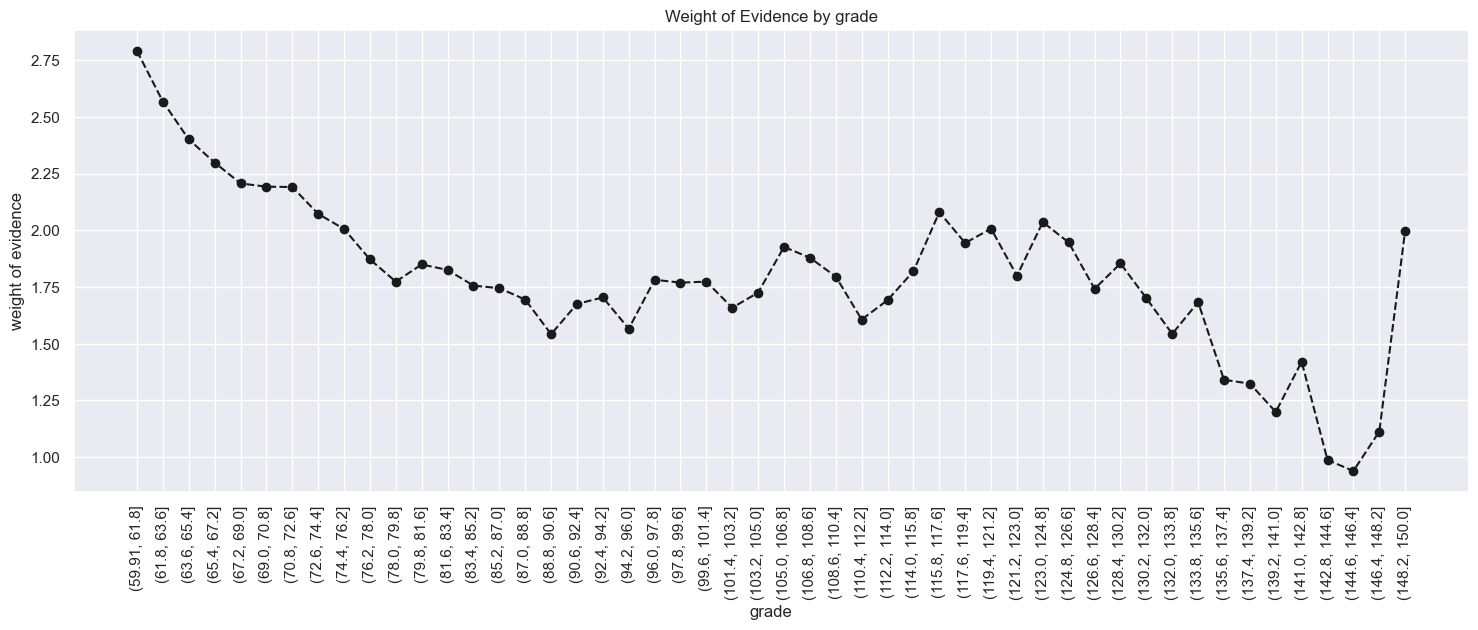

In [246]:
plot_by_woe(df_temp,90)

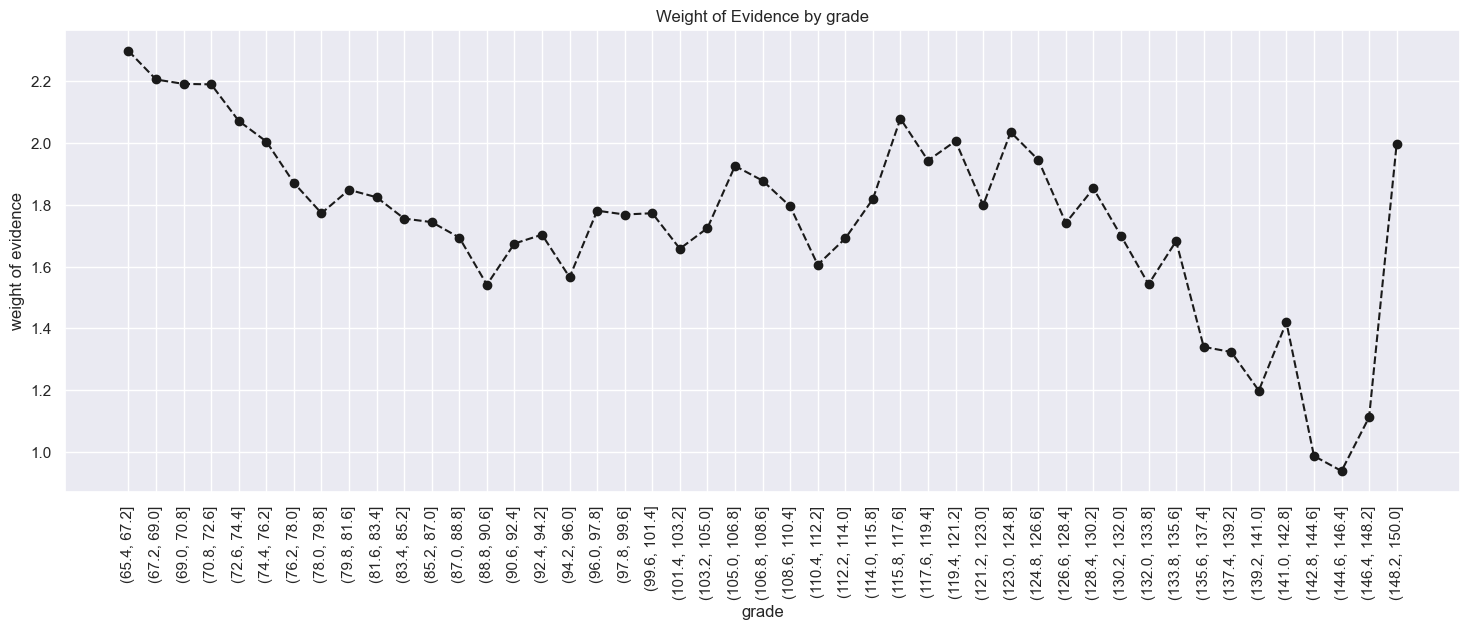

In [248]:
plot_by_woe(df_temp.iloc[3:,:],90)

In [250]:
df_inputs_prepr['mths_since_issued_date:<38']=np.where(df_inputs_prepr['mths_since_issued_date'].isin(range(38)),1,0)
df_inputs_prepr['mths_since_issued_date:38-39']=np.where(df_inputs_prepr['mths_since_issued_date'].isin(range(38,40)),1,0)
df_inputs_prepr['mths_since_issued_date:40-41']=np.where(df_inputs_prepr['mths_since_issued_date'].isin(range(40,42)),1,0)
df_inputs_prepr['mths_since_issued_date:42-48']=np.where(df_inputs_prepr['mths_since_issued_date'].isin(range(42,49)),1,0)
df_inputs_prepr['mths_since_issued_date:49-52']=np.where(df_inputs_prepr['mths_since_issued_date'].isin(range(49,53)),1,0)
df_inputs_prepr['mths_since_issued_date:53-64']=np.where(df_inputs_prepr['mths_since_issued_date'].isin(range(53,65)),1,0)
df_inputs_prepr['mths_since_issued_date:65-84']=np.where(df_inputs_prepr['mths_since_issued_date'].isin(range(65,85)),1,0)
df_inputs_prepr['mths_since_issued_date:>84']=np.where(df_inputs_prepr['mths_since_issued_date'].isin(range(85,int(df_inputs_prepr['mths_since_issued_date'].max()))),1,0)

In [252]:
df_inputs_prepr['int_rate_factor']=pd.cut(df_inputs_prepr['int_rate'],50)

In [254]:
df_temp=woe_continuous(df_inputs_prepr,'int_rate_factor',df_targets_prepr)
df_temp

/var/folders/s8/h9l9nw0s2h32gsbkdcyn3p_80000gp/T/ipykernel_1061/625061358.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0],as_index = False)[df.columns.values[1]].count(),
/var/folders/s8/h9l9nw0s2h32gsbkdcyn3p_80000gp/T/ipykernel_1061/625061358.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0],as_index = False)[df.columns.values[1]].mean()],axis=1)


,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(5.399, 5.833]",729,0.958848,0.002085,699.0,30.0,0.002244,0.000096,3.148453,NaN,NaN,0.76236
1,"(5.833, 6.246]",7944,0.980740,0.022716,7791.0,153.0,0.025012,0.000491,3.930287,0.021892,0.781833,0.76236
2,"(6.246, 6.658]",7368,0.971906,0.021069,7161.0,207.0,0.022989,0.000665,3.543686,0.008835,0.386600,0.76236
3,"(6.658, 7.071]",1693,0.972239,0.004841,1646.0,47.0,0.005284,0.000151,3.555956,0.000333,0.012270,0.76236
4,"(7.071, 7.484]",2930,0.975768,0.008378,2859.0,71.0,0.009178,0.000228,3.695547,0.003529,0.139592,0.76236
5,"(7.484, 7.897]",11806,0.962053,0.033759,11358.0,448.0,0.036463,0.001438,3.232884,0.013715,0.462663,0.76236
6,"(7.897, 8.31]",9113,0.949852,0.026059,8656.0,457.0,0.027789,0.001467,2.941325,0.012201,0.291560,0.76236
7,"(8.31, 8.722]",6178,0.965037,0.017666,5962.0,216.0,0.019140,0.000693,3.317883,0.015185,0.376558,0.76236
8,"(8.722, 9.135]",8950,0.938324,0.025592,8398.0,552.0,0.026960,0.001772,2.722201,0.026713,0.595682,0.76236
9,"(9.135, 9.548]",6207,0.964073,0.017749,5984.0,223.0,0.019211,0.000716,3.289673,0.025749,0.567472,0.76236


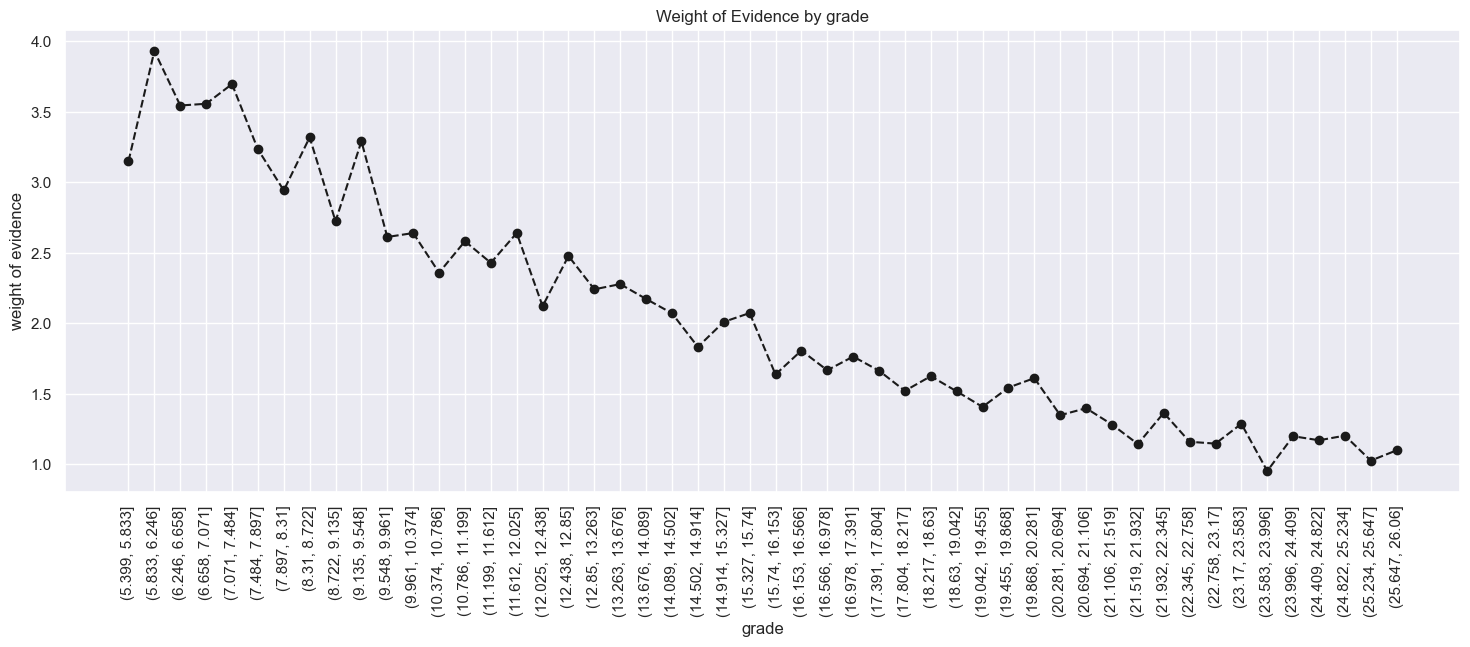

In [258]:
plot_by_woe(df_temp,90)

In [260]:
df_inputs_prepr['int_rate:<9.548']=np.where((df_inputs_prepr['int_rate']<= 0.548),1,0)
df_inputs_prepr['int_rate:9.548-12.025']=np.where((df_inputs_prepr['int_rate']>9.548)&(df_inputs_prepr['int_rate']<=12.025),1,0)
df_inputs_prepr['int_rate:12.025-15.74']=np.where((df_inputs_prepr['int_rate']>12.025)&(df_inputs_prepr['int_rate']<=15.74),1,0)
df_inputs_prepr['int_rate:15.74-20.281']=np.where((df_inputs_prepr['int_rate']>15.74)&(df_inputs_prepr['int_rate']<=20.281),1,0)
df_inputs_prepr['int_rate:20.281']=np.where((df_inputs_prepr['int_rate']>20.281),1,0)


In [262]:
df_inputs_prepr['funded_amnt_factor']=pd.cut(df_inputs_prepr['funded_amnt'],50)

In [264]:
df_temp=woe_continuous(df_inputs_prepr,'funded_amnt_factor',df_targets_prepr)
df_temp

/var/folders/s8/h9l9nw0s2h32gsbkdcyn3p_80000gp/T/ipykernel_1061/625061358.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0],as_index = False)[df.columns.values[1]].count(),
/var/folders/s8/h9l9nw0s2h32gsbkdcyn3p_80000gp/T/ipykernel_1061/625061358.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0],as_index = False)[df.columns.values[1]].mean()],axis=1)


,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(465.5, 1190.0]",1138,0.911248,0.003254,1037.0,101.0,0.003329,0.000324,2.328967,NaN,NaN,0.743469
1,"(1190.0, 1880.0]",2851,0.901438,0.008152,2570.0,281.0,0.008251,0.000902,2.213307,0.009810,0.115660,0.743469
2,"(1880.0, 2570.0]",5633,0.892952,0.016107,5030.0,603.0,0.016148,0.001936,2.121258,0.008486,0.092048,0.743469
3,"(2570.0, 3260.0]",6817,0.889101,0.019493,6061.0,756.0,0.019458,0.002427,2.081589,0.003851,0.039669,0.743469
4,"(3260.0, 3950.0]",4431,0.891447,0.012670,3950.0,481.0,0.012681,0.001544,2.105604,0.002346,0.024015,0.743469
5,"(3950.0, 4640.0]",8442,0.889600,0.024140,7510.0,932.0,0.024110,0.002992,2.086658,0.001847,0.018946,0.743469
6,"(4640.0, 5330.0]",14829,0.891834,0.042403,13225.0,1604.0,0.042457,0.005149,2.109608,0.002234,0.022951,0.743469
7,"(5330.0, 6020.0]",16229,0.906094,0.046407,14705.0,1524.0,0.047208,0.004893,2.266849,0.014260,0.157241,0.743469
8,"(6020.0, 6710.0]",6476,0.887585,0.018518,5748.0,728.0,0.018453,0.002337,2.066306,0.018509,0.200543,0.743469
9,"(6710.0, 7400.0]",11040,0.897736,0.031569,9911.0,1129.0,0.031818,0.003624,2.172313,0.010151,0.106007,0.743469


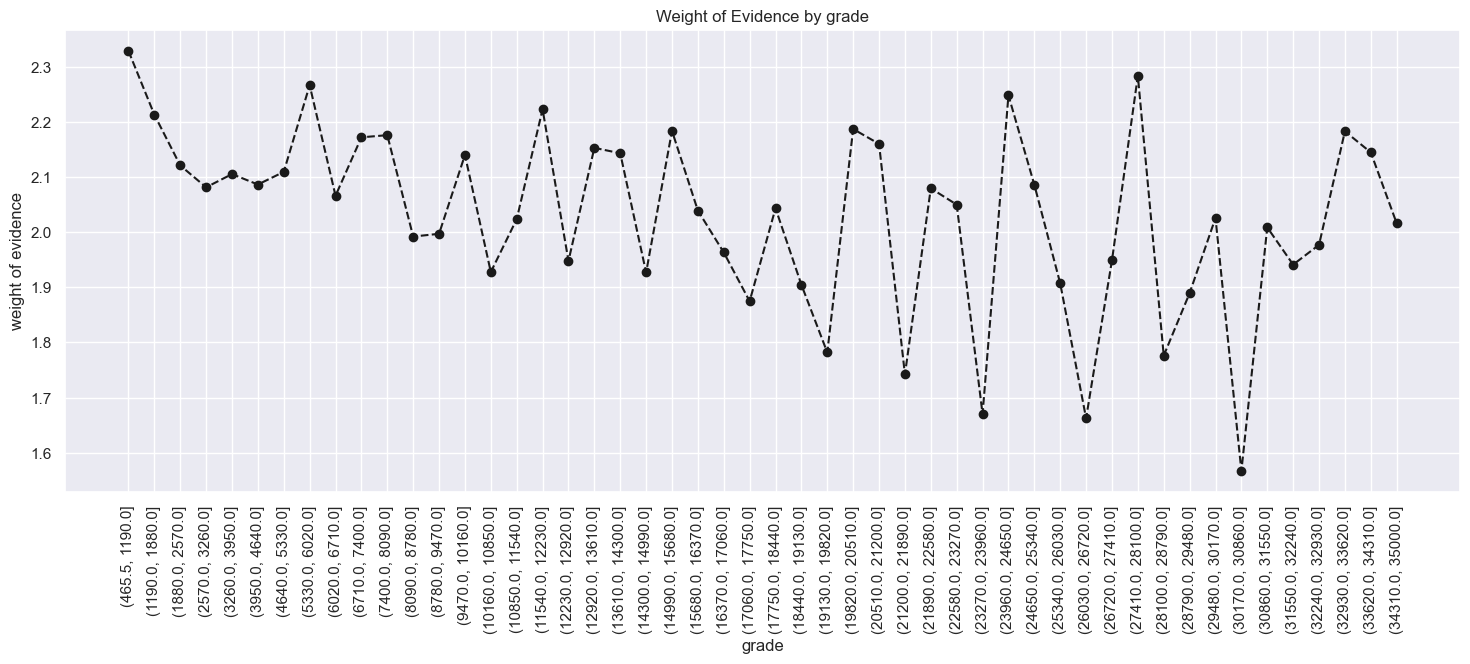

In [266]:
plot_by_woe(df_temp,90)

In [268]:
df_inputs_prepr['mths_since_earliest_cr_line']=df_inputs_prepr['mths_since_earliest_cr_line'].astype(float)

In [270]:
df_inputs_prepr['mths_since_earliest_cr_line_factor']=pd.cut(df_inputs_prepr['mths_since_earliest_cr_line'],50)

In [272]:
df_inputs_prepr['mths_since_earliest_cr_line_factor']

462574     (183.3, 195.52]
199825     (293.28, 305.5]
259957    (281.06, 293.28]
176933    (219.96, 232.18]
298       (268.84, 281.06]
                ...       
259178     (293.28, 305.5]
365838     (183.3, 195.52]
131932     (171.08, 183.3]
146867    (268.84, 281.06]
121958    (391.04, 403.26]
Name: mths_since_earliest_cr_line_factor, Length: 349713, dtype: category
Categories (50, interval[float64, right]): [(-0.611, 12.22] < (12.22, 24.44] < (24.44, 36.66] < (36.66, 48.88] ... (562.12, 574.34] < (574.34, 586.56] < (586.56, 598.78] < (598.78, 611.0]]

In [274]:
df_temp=woe_continuous(df_inputs_prepr,'mths_since_earliest_cr_line_factor',df_targets_prepr)
df_temp

/var/folders/s8/h9l9nw0s2h32gsbkdcyn3p_80000gp/T/ipykernel_1061/625061358.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0],as_index = False)[df.columns.values[1]].count(),
/var/folders/s8/h9l9nw0s2h32gsbkdcyn3p_80000gp/T/ipykernel_1061/625061358.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0],as_index = False)[df.columns.values[1]].mean()],axis=1)


,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.611, 12.22]",22,0.863636,0.000063,19.0,3.0,0.000061,0.000010,1.845827,NaN,NaN,0.743549
1,"(12.22, 24.44]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.743549
2,"(24.44, 36.66]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.743549
3,"(36.66, 48.88]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.743549
4,"(48.88, 61.1]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.743549
5,"(61.1, 73.32]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.743549
6,"(73.32, 85.54]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.743549
7,"(85.54, 97.76]",1,1.000000,0.000003,1.0,0.0,0.000003,0.000000,inf,NaN,NaN,0.743549
8,"(97.76, 109.98]",1082,0.901109,0.003094,975.0,107.0,0.003130,0.000344,2.209609,0.098891,inf,0.743549
9,"(109.98, 122.2]",2448,0.867647,0.007000,2124.0,324.0,0.006819,0.001040,1.880313,0.033462,0.329296,0.743549


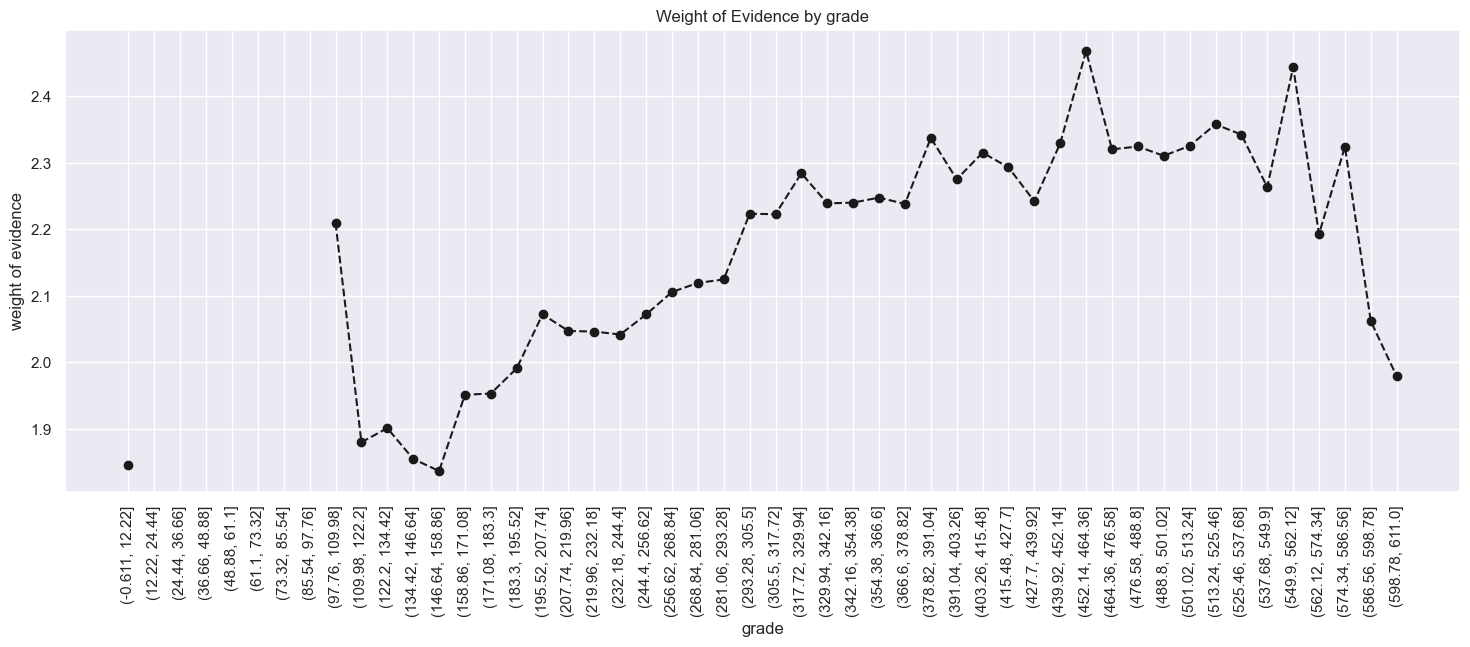

In [278]:
plot_by_woe(df_temp,90)

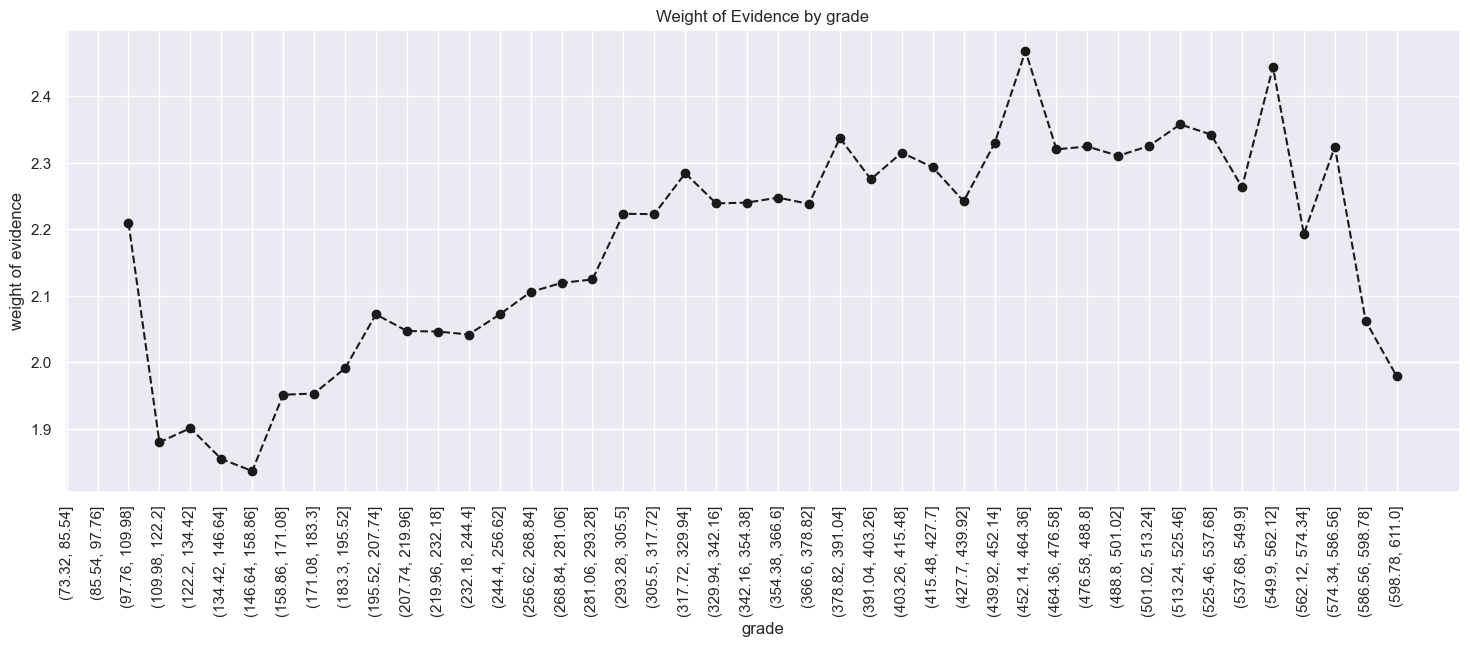

In [280]:
plot_by_woe(df_temp.iloc[3:,:],90)

In [282]:
df_inputs_prepr['mths_since_earliest_cr_line:<140']=np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(140)),1,0)
df_inputs_prepr['mths_since_earliest_cr_line:140-239']=np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(140,240)),1,0)
df_inputs_prepr['mths_since_earliest_cr_line:240-339']=np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(240,340)),1,0)
df_inputs_prepr['mths_since_earliest_cr_line:340-439']=np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(340,440)),1,0)
df_inputs_prepr['mths_since_earliest_cr_line:440-539']=np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(440,540)),1,0)
df_inputs_prepr['mths_since_earliest_cr_line:540-600']=np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(540,600)),1,0)
df_inputs_prepr['mths_since_earliest_cr_line:>600']=np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(600,int(df_inputs_prepr['mths_since_issued_date'].max()))),1,0)

In [284]:
df_inputs_prepr['installment'].unique()

array([263.35, 239.56, 361.52, ..., 718.44, 735.11, 464.48])

In [286]:
df_inputs_prepr['installment_factor']=pd.cut(df_inputs_prepr['installment'],50)
df_temp=woe_continuous(df_inputs_prepr,'installment_factor',df_targets_prepr)
df_temp

/var/folders/s8/h9l9nw0s2h32gsbkdcyn3p_80000gp/T/ipykernel_1061/625061358.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0],as_index = False)[df.columns.values[1]].count(),
/var/folders/s8/h9l9nw0s2h32gsbkdcyn3p_80000gp/T/ipykernel_1061/625061358.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0],as_index = False)[df.columns.values[1]].mean()],axis=1)


,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(14.276, 43.556]",1690,0.909467,0.004833,1537.0,153.0,0.004934,0.000491,2.307150,NaN,NaN,0.743433
1,"(43.556, 71.443]",4551,0.896287,0.013014,4079.0,472.0,0.013095,0.001515,2.156628,0.013181,0.150522,0.743433
2,"(71.443, 99.329]",6386,0.892734,0.018261,5701.0,685.0,0.018302,0.002199,2.118978,0.003552,0.037650,0.743433
3,"(99.329, 127.216]",8558,0.889928,0.024471,7616.0,942.0,0.024450,0.003024,2.090001,0.002807,0.028977,0.743433
4,"(127.216, 155.102]",9416,0.895497,0.026925,8432.0,984.0,0.027069,0.003159,2.148163,0.005569,0.058162,0.743433
5,"(155.102, 182.988]",15689,0.893811,0.044863,14023.0,1666.0,0.045018,0.005348,2.130273,0.001686,0.017890,0.743433
6,"(182.988, 210.875]",16176,0.904983,0.046255,14639.0,1537.0,0.046996,0.004934,2.253857,0.011172,0.123583,0.743433
7,"(210.875, 238.761]",14132,0.900722,0.040410,12729.0,1403.0,0.040864,0.004504,2.205270,0.004261,0.048587,0.743433
8,"(238.761, 266.648]",17614,0.901669,0.050367,15882.0,1732.0,0.050986,0.005560,2.215910,0.000947,0.010640,0.743433
9,"(266.648, 294.534]",18848,0.890917,0.053896,16792.0,2056.0,0.053908,0.006600,2.100140,0.010752,0.115769,0.743433


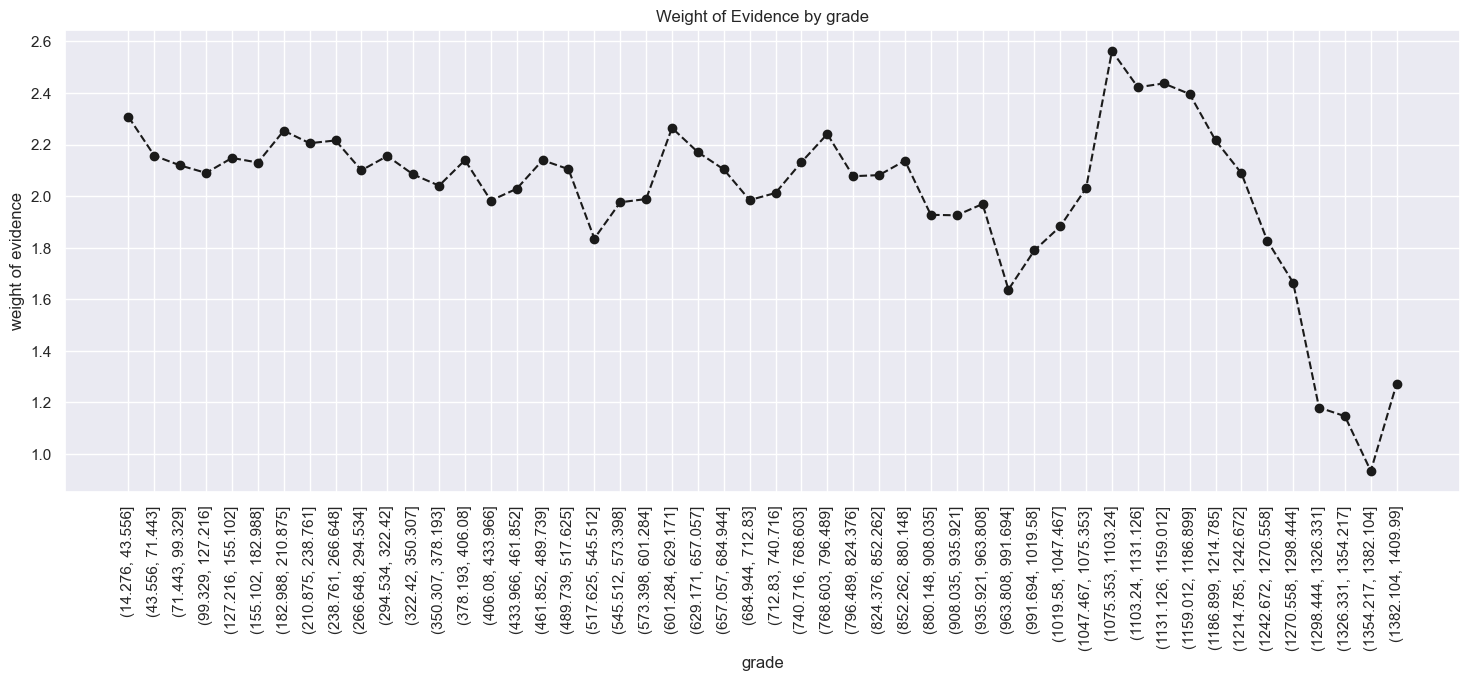

In [290]:
plot_by_woe(df_temp,90)

In [292]:
df_inputs_prepr['delinq_2yrs']=df_inputs_prepr['delinq_2yrs'].astype(float)

In [294]:
df_inputs_prepr['delinq_2yrs_factors']=pd.cut(df_inputs_prepr['delinq_2yrs'],50)

In [304]:
df_temp=woe_continuous(df_inputs_prepr,'delinq_2yrs',df_targets_prepr)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,287204,0.890586,0.821256,255780.0,31424.0,0.821137,0.100881,2.096746,NaN,NaN,0.7426
1,1.0,42141,0.893026,0.120502,37633.0,4508.0,0.120814,0.014472,2.122028,0.002439,2.528196e-02,0.7426
2,2.0,12357,0.889455,0.035335,10991.0,1366.0,0.035285,0.004385,2.085190,0.003570,3.683773e-02,0.7426
3,3.0,4255,0.882726,0.012167,3756.0,499.0,0.012058,0.001602,2.018504,0.006729,6.668625e-02,0.7426
4,4.0,1745,0.897421,0.004990,1566.0,179.0,0.005027,0.000575,2.168894,0.014695,1.503903e-01,0.7426
5,5.0,911,0.878156,0.002605,800.0,111.0,0.002568,0.000356,1.975082,0.019265,1.938125e-01,0.7426
6,6.0,467,0.899358,0.001335,420.0,47.0,0.001348,0.000151,2.190107,0.021202,2.150256e-01,0.7426
7,7.0,259,0.868726,0.000741,225.0,34.0,0.000722,0.000109,1.889740,0.030632,3.003672e-01,0.7426
8,8.0,138,0.898551,0.000395,124.0,14.0,0.000398,0.000045,2.181224,0.029825,2.914844e-01,0.7426
9,9.0,82,0.878049,0.000234,72.0,10.0,0.000231,0.000032,1.974081,0.020502,2.071432e-01,0.7426


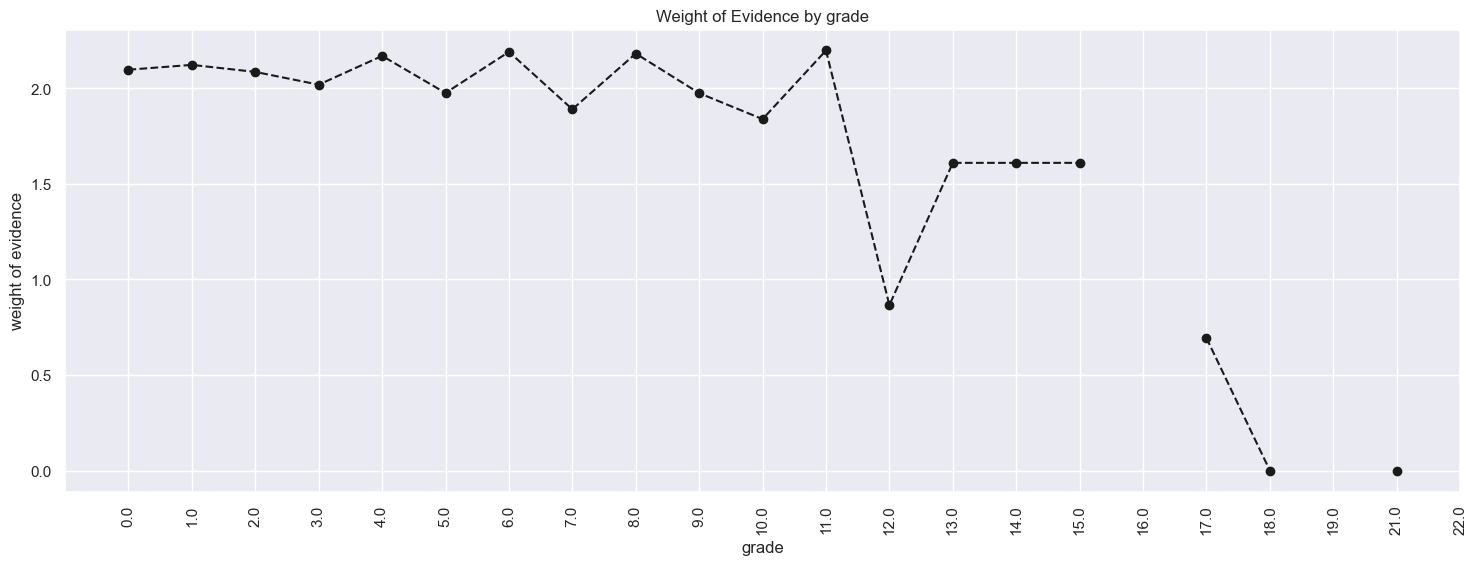

In [306]:
plot_by_woe(df_temp,90)

In [308]:
df_inputs_prepr['delinq_2yrs:0']=np.where((df_inputs_prepr['delinq_2yrs']==0.0),1,0)
df_inputs_prepr['delinq_2yrs:0-3']=np.where((df_inputs_prepr['delinq_2yrs']>0.0)&(df_inputs_prepr['delinq_2yrs']<=3),1,0)
df_inputs_prepr['delinq_2yrs:3-7']=np.where((df_inputs_prepr['delinq_2yrs']>3)&(df_inputs_prepr['delinq_2yrs']<=7),1,0)
df_inputs_prepr['delinq_2yrs:7-9']=np.where((df_inputs_prepr['delinq_2yrs']>7)&(df_inputs_prepr['delinq_2yrs']<=9),1,0)
df_inputs_prepr['delinq_2yrs:9-11']=np.where((df_inputs_prepr['delinq_2yrs']>9)&(df_inputs_prepr['delinq_2yrs']<=11),1,0)
df_inputs_prepr['delinq_2yrs:11-12']=np.where((df_inputs_prepr['delinq_2yrs']>11)&(df_inputs_prepr['delinq_2yrs']<=12),1,0)
df_inputs_prepr['delinq_2yrs:12-18']=np.where((df_inputs_prepr['delinq_2yrs']>12)&(df_inputs_prepr['delinq_2yrs']<=18),1,0)
df_inputs_prepr['delinq_2yrs:>18']=np.where((df_inputs_prepr['delinq_2yrs']>18),1,0)

In [310]:
df_inputs_prepr['inq_last_6mths']=df_inputs_prepr['inq_last_6mths'].astype(float)

In [312]:
df_temp=woe_continuous(df_inputs_prepr,'inq_last_6mths',df_targets_prepr)
df_temp

/opt/anaconda3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,181037,0.908477,0.517673,164468.0,16569.0,0.527996,0.053192,2.295183,NaN,NaN,inf
1,1.0,97660,0.884958,0.279258,86425.0,11235.0,0.277452,0.036068,2.040243,0.023519,0.254939,inf
2,2.0,43404,0.864413,0.124113,37519.0,5885.0,0.120448,0.018893,1.852441,0.020545,0.187802,inf
3,3.0,18820,0.839532,0.053816,15800.0,3020.0,0.050723,0.009695,1.654753,0.024881,0.197688,inf
4,4.0,5431,0.846437,0.015530,4597.0,834.0,0.014758,0.002677,1.706926,0.006905,0.052173,inf
5,5.0,2086,0.827421,0.005965,1726.0,360.0,0.005541,0.001156,1.567458,0.019016,0.139468,inf
6,6.0,926,0.788337,0.002648,730.0,196.0,0.002344,0.000629,1.314930,0.039084,0.252528,inf
7,7.0,144,0.659722,0.000412,95.0,49.0,0.000305,0.000157,0.662057,0.128615,0.652873,inf
8,8.0,93,0.666667,0.000266,62.0,31.0,0.000199,0.000100,0.693147,0.006944,0.031091,inf
9,9.0,41,0.682927,0.000117,28.0,13.0,0.000090,0.000042,0.767255,0.016260,0.074108,inf


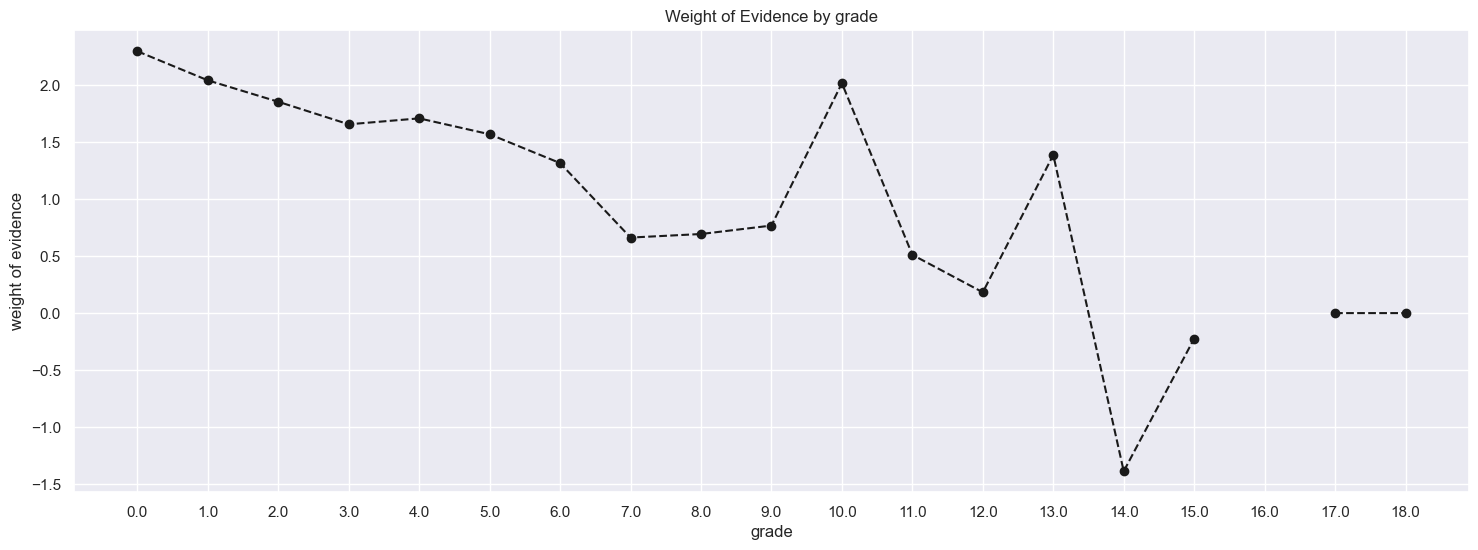

In [314]:
plot_by_woe(df_temp)

In [316]:
df_inputs_prepr['inq_last_6mths:0'] = np.where(df_inputs_prepr['inq_last_6mths'] == 0.0, 1, 0)
df_inputs_prepr['inq_last_6mths:0-3'] = np.where((df_inputs_prepr['inq_last_6mths'] > 0.0) & (df_inputs_prepr['inq_last_6mths'] <= 3), 1, 0)
df_inputs_prepr['inq_last_6mths:3-7'] = np.where((df_inputs_prepr['inq_last_6mths'] > 3) & (df_inputs_prepr['inq_last_6mths'] <= 7), 1, 0)
df_inputs_prepr['inq_last_6mths:7-9'] = np.where((df_inputs_prepr['inq_last_6mths'] > 7) & (df_inputs_prepr['inq_last_6mths'] <= 9), 1, 0)
df_inputs_prepr['inq_last_6mths:9-11'] = np.where((df_inputs_prepr['inq_last_6mths'] > 9) & (df_inputs_prepr['inq_last_6mths'] <= 11), 1, 0)
df_inputs_prepr['inq_last_6mths:11-12'] = np.where((df_inputs_prepr['inq_last_6mths'] > 11) & (df_inputs_prepr['inq_last_6mths'] <= 12), 1, 0)
df_inputs_prepr['inq_last_6mths:12-18'] = np.where((df_inputs_prepr['inq_last_6mths'] > 12) & (df_inputs_prepr['inq_last_6mths'] <= 18), 1, 0)
df_inputs_prepr['inq_last_6mths:>18'] = np.where(df_inputs_prepr['inq_last_6mths'] > 18, 1, 0)


In [318]:
df_inputs_prepr['open_acc']=df_inputs_prepr['open_acc'].astype(float)
df_temp=woe_continuous(df_inputs_prepr,'open_acc',df_targets_prepr)
df_temp

/opt/anaconda3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,27,0.740741,0.000077,20.0,7.0,0.000064,0.000022,1.049822,NaN,NaN,inf
1,1.0,102,0.862745,0.000292,88.0,14.0,0.000283,0.000045,1.838279,0.122004,0.788457,inf
2,2.0,1374,0.844978,0.003929,1161.0,213.0,0.003727,0.000684,1.695745,0.017767,0.142535,inf
3,3.0,4090,0.873594,0.011695,3573.0,517.0,0.011470,0.001660,1.933118,0.028616,0.237373,inf
4,4.0,9392,0.891184,0.026856,8370.0,1022.0,0.026870,0.003281,2.102892,0.017590,0.169774,inf
5,5.0,16105,0.889786,0.046052,14330.0,1775.0,0.046004,0.005698,2.088555,0.001398,0.014338,inf
6,6.0,23057,0.892007,0.065931,20567.0,2490.0,0.066027,0.007994,2.111405,0.002221,0.022850,inf
7,7.0,28255,0.891878,0.080795,25200.0,3055.0,0.080900,0.009808,2.110064,0.000129,0.001341,inf
8,8.0,31523,0.891254,0.090140,28095.0,3428.0,0.090194,0.011005,2.103615,0.000624,0.006450,inf
9,9.0,33018,0.889000,0.094415,29353.0,3665.0,0.094233,0.011766,2.080566,0.002254,0.023048,inf


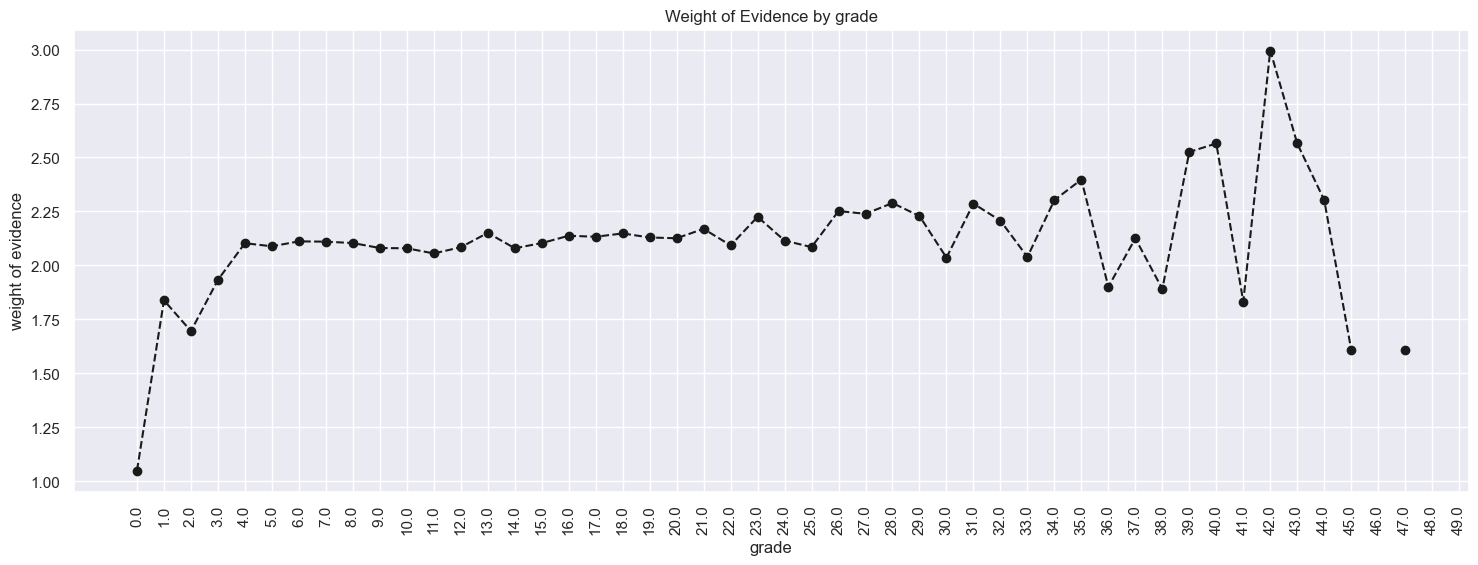

In [322]:
plot_by_woe(df_temp,90)

In [324]:
df_inputs_prepr['open_acc:0'] = np.where(df_inputs_prepr['open_acc'] == 0.0, 1, 0)
df_inputs_prepr['open_acc:0-1'] = np.where((df_inputs_prepr['open_acc'] > 0.0) & (df_inputs_prepr['open_acc'] <= 1), 1, 0)
df_inputs_prepr['open_acc:1-4'] = np.where((df_inputs_prepr['open_acc'] > 1) & (df_inputs_prepr['open_acc'] <= 4), 1, 0)
df_inputs_prepr['open_acc:4-28'] = np.where((df_inputs_prepr['open_acc'] > 4) & (df_inputs_prepr['open_acc'] <= 28), 1, 0)
df_inputs_prepr['open_acc:28-35'] = np.where((df_inputs_prepr['open_acc'] > 28) & (df_inputs_prepr['open_acc'] <= 35), 1, 0)
df_inputs_prepr['open_acc:35-45'] = np.where((df_inputs_prepr['open_acc'] > 35) & (df_inputs_prepr['open_acc'] <= 45), 1, 0)
df_inputs_prepr['open_acc:<45'] = np.where(df_inputs_prepr['open_acc'] < 45, 0, 1)


In [328]:
df_inputs_prepr['pub_rec']=df_inputs_prepr['pub_rec'].astype(float)

In [330]:
df_temp=woe_continuous(df_inputs_prepr,'pub_rec',df_targets_prepr)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,303755,0.889980,0.868584,270336.0,33419.0,0.867866,0.107286,2.090541,NaN,NaN,0.742509
1,1.0,39743,0.893365,0.113645,35505.0,4238.0,0.113983,0.013605,2.125582,0.003384,0.035041,0.742509
2,2.0,4230,0.903073,0.012096,3820.0,410.0,0.012263,0.001316,2.231849,0.009708,0.106266,0.742509
3,3.0,1207,0.921292,0.003451,1112.0,95.0,0.003570,0.000305,2.460039,0.018219,0.228190,0.742509
4,4.0,382,0.921466,0.001092,352.0,30.0,0.001130,0.000096,2.462434,0.000174,0.002395,0.742509
5,5.0,185,0.918919,0.000529,170.0,15.0,0.000546,0.000048,2.427748,0.002547,0.034686,0.742509
6,6.0,105,0.942857,0.000300,99.0,6.0,0.000318,0.000019,2.803360,0.023938,0.375612,0.742509
7,7.0,44,0.954545,0.000126,42.0,2.0,0.000135,0.000006,3.044522,0.011688,0.241162,0.742509
8,8.0,24,1.000000,0.000069,24.0,0.0,0.000077,0.000000,inf,0.045455,inf,0.742509
9,9.0,12,0.750000,0.000034,9.0,3.0,0.000029,0.000010,1.098612,0.250000,inf,0.742509


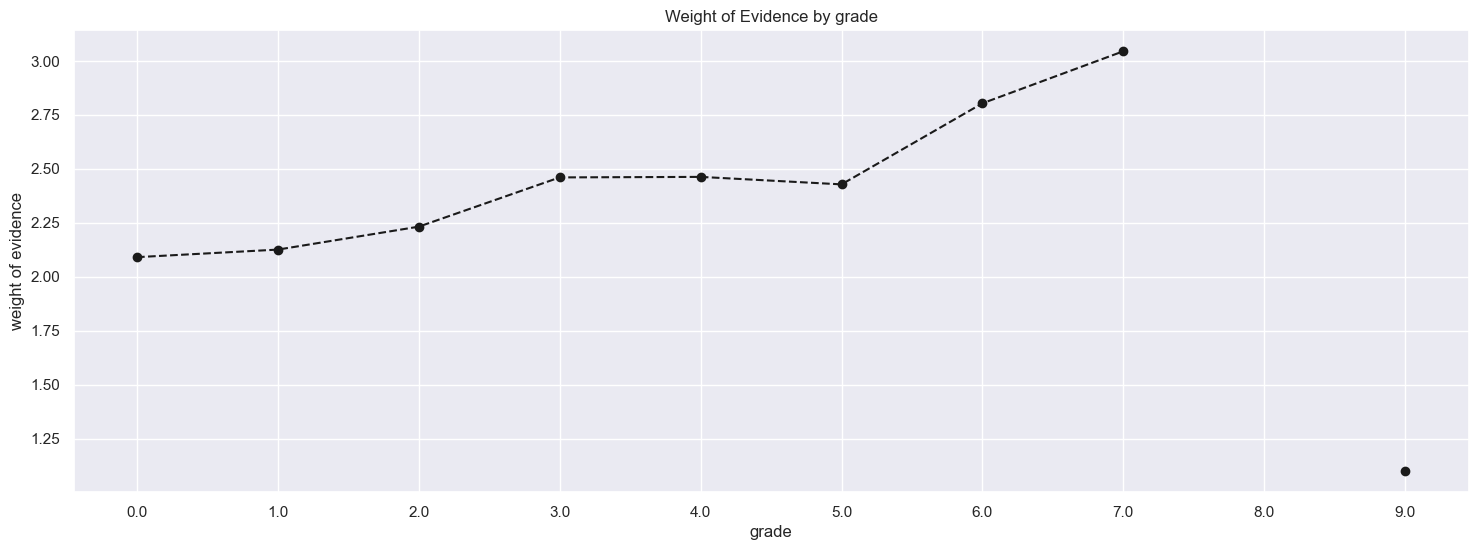

In [332]:
plot_by_woe(df_temp)

In [334]:
df_inputs_prepr['pub_rec:0-3'] = np.where((df_inputs_prepr['pub_rec'] >= 0) & (df_inputs_prepr['pub_rec'] <= 3), 1, 0)
df_inputs_prepr['pub_rec:3-6'] = np.where((df_inputs_prepr['pub_rec'] > 3) & (df_inputs_prepr['pub_rec'] <= 6), 1, 0)
df_inputs_prepr['pub_rec:6-8'] = np.where((df_inputs_prepr['pub_rec'] > 6) & (df_inputs_prepr['pub_rec'] <= 8), 1, 0)
df_inputs_prepr['pub_rec:>8'] = np.where(df_inputs_prepr['pub_rec'] > 8, 1, 0)


In [336]:
df_inputs_prepr['total_acc']=df_inputs_prepr['total_acc'].astype(float)

In [338]:
df_inputs_prepr['total_acc_fac']=pd.cut(df_inputs_prepr['total_acc'],50)

In [340]:
df_temp=woe_continuous(df_inputs_prepr,'total_acc_fac',df_targets_prepr)
df_temp

/var/folders/s8/h9l9nw0s2h32gsbkdcyn3p_80000gp/T/ipykernel_1061/625061358.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0],as_index = False)[df.columns.values[1]].count(),
/var/folders/s8/h9l9nw0s2h32gsbkdcyn3p_80000gp/T/ipykernel_1061/625061358.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0],as_index = False)[df.columns.values[1]].mean()],axis=1)


,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.15, 3.0]",439,0.808656,0.001255,355.0,84.0,0.001140,0.000270,1.441301,NaN,NaN,0.743048
1,"(3.0, 6.0]",5641,0.863499,0.016130,4871.0,770.0,0.015637,0.002472,1.844664,0.054843,0.403363,0.743048
2,"(6.0, 9.0]",14131,0.872691,0.040407,12332.0,1799.0,0.039590,0.005775,1.924967,0.009192,0.080303,0.743048
3,"(9.0, 12.0]",23595,0.880356,0.067470,20772.0,2823.0,0.066685,0.009063,1.995806,0.007665,0.070839,0.743048
4,"(12.0, 15.0]",31444,0.882649,0.089914,27754.0,3690.0,0.089099,0.011846,2.017754,0.002293,0.021948,0.743048
5,"(15.0, 18.0]",36229,0.887383,0.103596,32149.0,4080.0,0.103209,0.013098,2.064284,0.004735,0.046531,0.743048
6,"(18.0, 21.0]",38103,0.886256,0.108955,33769.0,4334.0,0.108409,0.013914,2.053052,0.001127,0.011232,0.743048
7,"(21.0, 24.0]",37627,0.891647,0.107594,33550.0,4077.0,0.107706,0.013088,2.107675,0.005391,0.054623,0.743048
8,"(24.0, 27.0]",33976,0.895338,0.097154,30420.0,3556.0,0.097658,0.011416,2.146464,0.003691,0.038789,0.743048
9,"(27.0, 30.0]",29823,0.899440,0.085278,26824.0,2999.0,0.086114,0.009628,2.191018,0.004102,0.044554,0.743048


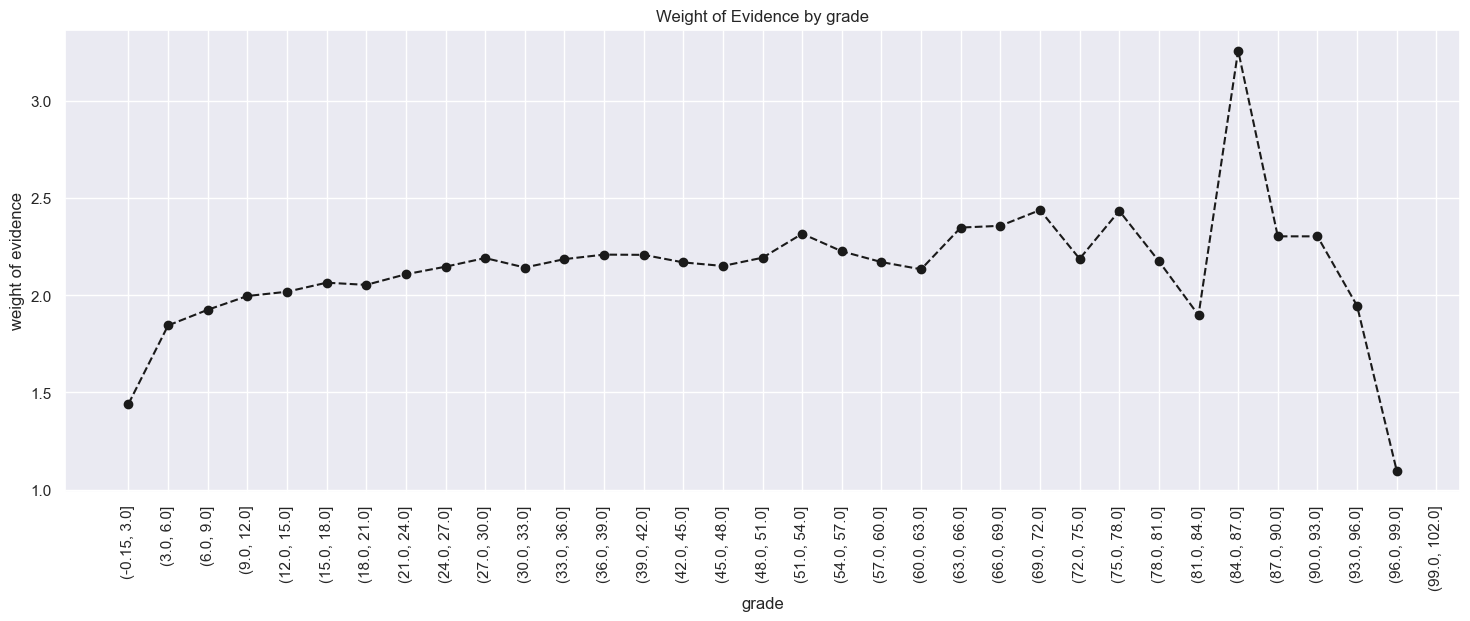

In [344]:
plot_by_woe(df_temp,90)

In [346]:
df_inputs_prepr['total_acc:<0'] = np.where(df_inputs_prepr['total_acc'] < 0, 1, 0)
df_inputs_prepr['total_acc:0-4'] = np.where((df_inputs_prepr['total_acc'] >= 0) & (df_inputs_prepr['total_acc'] <= 4), 1, 0)
df_inputs_prepr['total_acc:4-62'] = np.where((df_inputs_prepr['total_acc'] > 4) & (df_inputs_prepr['total_acc'] <= 62), 1, 0)
df_inputs_prepr['total_acc:62-72'] = np.where((df_inputs_prepr['total_acc'] > 62) & (df_inputs_prepr['total_acc'] <= 72), 1, 0)
df_inputs_prepr['total_acc:72-85'] = np.where((df_inputs_prepr['total_acc'] > 72) & (df_inputs_prepr['total_acc'] <= 85), 1, 0)
df_inputs_prepr['total_acc:>85'] = np.where(df_inputs_prepr['total_acc'] > 85, 1, 0)


In [348]:
df_inputs_prepr['acc_now_delinq']=df_inputs_prepr['acc_now_delinq'].astype(float)

In [350]:
df_temp=woe_continuous(df_inputs_prepr,'acc_now_delinq',df_targets_prepr)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,348445,0.890677,0.996374,310352.0,38093.0,0.996331,0.122291,2.097677,NaN,NaN,0.742579
1,1.0,1187,0.900590,0.003394,1069.0,118.0,0.003432,0.000379,2.203794,0.009913,0.106118,0.742579
2,2.0,68,0.926471,0.000194,63.0,5.0,0.000202,0.000016,2.533697,0.025881,0.329903,0.742579
3,3.0,7,0.857143,0.000020,6.0,1.0,0.000019,0.000003,1.791759,0.069328,0.741937,0.742579
4,4.0,4,1.000000,0.000011,4.0,0.0,0.000013,0.000000,inf,0.142857,inf,0.742579
5,5.0,2,0.500000,0.000006,1.0,1.0,0.000003,0.000003,0.000000,0.500000,inf,0.742579


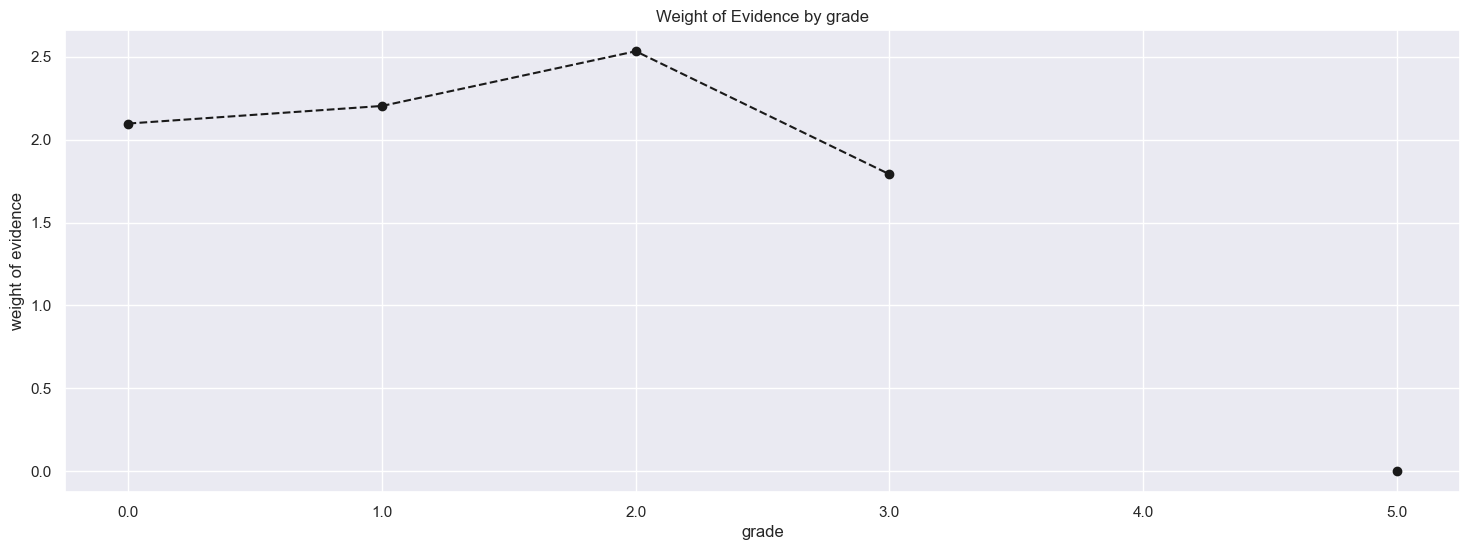

In [352]:
plot_by_woe(df_temp)

In [354]:
df_inputs_prepr['acc_now_delinq:<0'] = np.where(df_inputs_prepr['acc_now_delinq'] < 0, 1, 0)
df_inputs_prepr['acc_now_delinq:0-1'] = np.where((df_inputs_prepr['acc_now_delinq'] >= 0) & (df_inputs_prepr['acc_now_delinq'] <= 1), 1, 0)
df_inputs_prepr['acc_now_delinq:1-2'] = np.where((df_inputs_prepr['acc_now_delinq'] > 1) & (df_inputs_prepr['acc_now_delinq'] <= 2), 1, 0)
df_inputs_prepr['acc_now_delinq:2-3'] = np.where((df_inputs_prepr['acc_now_delinq'] > 2) & (df_inputs_prepr['acc_now_delinq'] <= 3), 1, 0)
df_inputs_prepr['acc_now_delinq:3-5'] = np.where((df_inputs_prepr['acc_now_delinq'] > 3) & (df_inputs_prepr['acc_now_delinq'] <= 5), 1, 0)
df_inputs_prepr['acc_now_delinq:>5'] = np.where(df_inputs_prepr['acc_now_delinq'] > 5, 1, 0)


In [356]:
df_inputs_prepr_temp=df_inputs_prepr.loc[df_inputs_prepr['total_rev_hi_lim']<= 80000,:]

In [358]:
df_inputs_prepr['total_rev_hi_lim_factor']=pd.cut(df_inputs_prepr_temp['total_rev_hi_lim'],50)
df_temp=woe_continuous(df_inputs_prepr,'total_rev_hi_lim_factor',df_targets_prepr)
df_temp

/var/folders/s8/h9l9nw0s2h32gsbkdcyn3p_80000gp/T/ipykernel_1061/625061358.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0],as_index = False)[df.columns.values[1]].count(),
/var/folders/s8/h9l9nw0s2h32gsbkdcyn3p_80000gp/T/ipykernel_1061/625061358.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0],as_index = False)[df.columns.values[1]].mean()],axis=1)


,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-80.0, 1600.0]",1984,0.853831,0.005900,1694.0,290.0,0.005668,0.000970,1.764967,NaN,NaN,0.741731
1,"(1600.0, 3200.0]",6234,0.859641,0.018537,5359.0,875.0,0.017931,0.002928,1.812309,0.005810,0.047342,0.741731
2,"(3200.0, 4800.0]",9516,0.872005,0.028297,8298.0,1218.0,0.027766,0.004075,1.918804,0.012364,0.106496,0.741731
3,"(4800.0, 6400.0]",15187,0.870415,0.045160,13219.0,1968.0,0.044231,0.006585,1.904637,0.001590,0.014167,0.741731
4,"(6400.0, 8000.0]",16576,0.877775,0.049290,14550.0,2026.0,0.048685,0.006779,1.971528,0.007360,0.066890,0.741731
5,"(8000.0, 9600.0]",15250,0.880459,0.045347,13427.0,1823.0,0.044927,0.006100,1.996784,0.002684,0.025257,0.741731
6,"(9600.0, 11200.0]",18991,0.875573,0.056471,16628.0,2363.0,0.055638,0.007907,1.951156,0.004886,0.045628,0.741731
7,"(11200.0, 12800.0]",18369,0.881213,0.054622,16187.0,2182.0,0.054162,0.007301,2.003967,0.005640,0.052811,0.741731
8,"(12800.0, 14400.0]",16346,0.884069,0.048606,14451.0,1895.0,0.048354,0.006341,2.031545,0.002857,0.027578,0.741731
9,"(14400.0, 16000.0]",18430,0.872328,0.054803,16077.0,2353.0,0.053794,0.007873,1.921699,0.011742,0.109846,0.741731


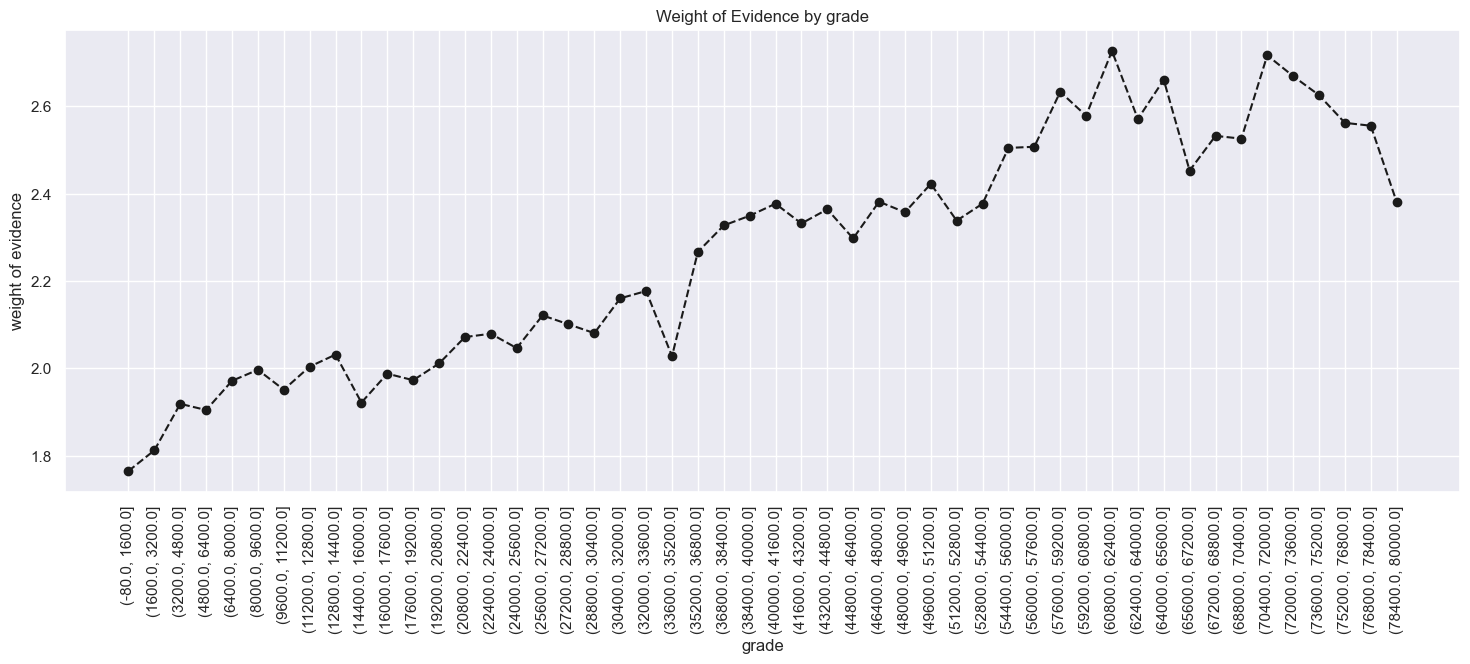

In [360]:
plot_by_woe(df_temp,90)

In [362]:
df_inputs_prepr['total_rev_hi_lim:<=5k'] = np.where(df_inputs_prepr['total_rev_hi_lim'] <= 5000, 1, 0)
df_inputs_prepr['total_rev_hi_lim:5k_10k'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 5000) & (df_inputs_prepr['total_rev_hi_lim'] <= 10000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:10k_20k'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 10000) & (df_inputs_prepr['total_rev_hi_lim'] <= 20000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:20k_30k'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 20000) & (df_inputs_prepr['total_rev_hi_lim'] <= 30000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:30k_40k'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 30000) & (df_inputs_prepr['total_rev_hi_lim'] <= 40000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:40k_50k'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 40000) & (df_inputs_prepr['total_rev_hi_lim'] <= 50000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:50k_65k'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 50000) & (df_inputs_prepr['total_rev_hi_lim'] <= 65000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:65k_80k'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 65000) & (df_inputs_prepr['total_rev_hi_lim'] <= 80000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:>80k'] = np.where(df_inputs_prepr['total_rev_hi_lim'] > 80000, 1, 0)

/var/folders/s8/h9l9nw0s2h32gsbkdcyn3p_80000gp/T/ipykernel_1061/1279711036.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_inputs_prepr['total_rev_hi_lim:5k_10k'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 5000) & (df_inputs_prepr['total_rev_hi_lim'] <= 10000), 1, 0)
/var/folders/s8/h9l9nw0s2h32gsbkdcyn3p_80000gp/T/ipykernel_1061/1279711036.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_inputs_prepr['total_rev_hi_lim:10k_20k'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 10000) & (df_inputs_prepr['tota

In [364]:
df_inputs_prepr['annual_inc_factor']=pd.cut(df_inputs_prepr['annual_inc'],100)
df_temp=woe_continuous(df_inputs_prepr,'annual_inc_factor',df_targets_prepr)
df_temp

/var/folders/s8/h9l9nw0s2h32gsbkdcyn3p_80000gp/T/ipykernel_1061/1881544122.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_inputs_prepr['annual_inc_factor']=pd.cut(df_inputs_prepr['annual_inc'],100)
/var/folders/s8/h9l9nw0s2h32gsbkdcyn3p_80000gp/T/ipykernel_1061/625061358.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0],as_index = False)[df.columns.values[1]].count(),
/var/folders/s8/h9l9nw0s2h32gsbkdcyn3p_80000gp/T/ipykernel_1061/625061358.py:8: FutureWarning: The default of observed=False is deprecated and wil

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-5243.882, 73294.82]",216950,0.875958,0.620366,190039.0,26911.0,0.610087,0.086393,1.954694,NaN,NaN,0.744783
1,"(73294.82, 144693.64]",112846,0.912970,0.322682,103025.0,9821.0,0.330744,0.031529,2.350449,0.037012,0.395755,0.744783
2,"(144693.64, 216092.46]",14959,0.924728,0.042775,13833.0,1126.0,0.044408,0.003615,2.508386,0.011758,0.157937,0.744783
3,"(216092.46, 287491.28]",2969,0.926238,0.008490,2750.0,219.0,0.008828,0.000703,2.530284,0.001510,0.021899,0.744783
4,"(287491.28, 358890.1]",1046,0.926386,0.002991,969.0,77.0,0.003111,0.000247,2.532459,0.000148,0.002175,0.744783
5,"(358890.1, 430288.92]",384,0.934896,0.001098,359.0,25.0,0.001153,0.000080,2.664447,0.008510,0.131987,0.744783
6,"(430288.92, 501687.74]",229,0.943231,0.000655,216.0,13.0,0.000693,0.000042,2.810329,0.008336,0.145882,0.744783
7,"(501687.74, 573086.56]",83,0.915663,0.000237,76.0,7.0,0.000244,0.000022,2.384823,0.027569,0.425506,0.744783
8,"(573086.56, 644485.38]",59,0.864407,0.000169,51.0,8.0,0.000164,0.000026,1.852384,0.051256,0.532439,0.744783
9,"(644485.38, 715884.2]",47,0.914894,0.000134,43.0,4.0,0.000138,0.000013,2.374906,0.050487,0.522522,0.744783


As we can see higher values in annual_inc has very less observation so we will take only those annual income which are less than 140000

In [366]:
df_inputs_prepr_temp=df_inputs_prepr.loc[df_inputs_prepr['annual_inc']<= 140000,:]

In [370]:
df_inputs_prepr_temp['annual_inc_factor']=pd.cut(df_inputs_prepr_temp['annual_inc'],50)
df_temp=woe_continuous(df_inputs_prepr_temp,'annual_inc_factor',df_targets_prepr)
df_temp

/var/folders/s8/h9l9nw0s2h32gsbkdcyn3p_80000gp/T/ipykernel_1061/3684062641.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp['annual_inc_factor']=pd.cut(df_inputs_prepr_temp['annual_inc'],50)
/var/folders/s8/h9l9nw0s2h32gsbkdcyn3p_80000gp/T/ipykernel_1061/625061358.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0],as_index = False)[df.columns.values[1]].count(),
/var/folders/s8/h9l9nw0s2h32gsbkdcyn3p_80000gp/T/ipykernel_1061/625061358.py:8: FutureWarning: The default of observed=False i

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(1757.896, 4658.08]",15,0.800000,0.000046,12.0,3.0,0.000041,0.000010,1.386294,NaN,NaN,0.742736
1,"(4658.08, 7420.16]",36,0.777778,0.000109,28.0,8.0,0.000096,0.000027,1.252763,0.022222,0.133531,0.742736
2,"(7420.16, 10182.24]",271,0.874539,0.000824,237.0,34.0,0.000811,0.000116,1.941700,0.096761,0.688937,0.742736
3,"(10182.24, 12944.32]",506,0.828063,0.001538,419.0,87.0,0.001433,0.000298,1.571963,0.046476,0.369737,0.742736
4,"(12944.32, 15706.4]",1138,0.829525,0.003459,944.0,194.0,0.003229,0.000664,1.582268,0.001462,0.010305,0.742736
5,"(15706.4, 18468.48]",1431,0.844864,0.004350,1209.0,222.0,0.004136,0.000759,1.694871,0.015338,0.112603,0.742736
6,"(18468.48, 21230.56]",2751,0.854235,0.008362,2350.0,401.0,0.008039,0.001372,1.768209,0.009371,0.073338,0.742736
7,"(21230.56, 23992.64]",2330,0.842060,0.007082,1962.0,368.0,0.006711,0.001259,1.673637,0.012175,0.094572,0.742736
8,"(23992.64, 26754.72]",6595,0.848976,0.020046,5599.0,996.0,0.019153,0.003407,1.726596,0.006916,0.052959,0.742736
9,"(26754.72, 29516.8]",5283,0.855196,0.016058,4518.0,765.0,0.015455,0.002617,1.775949,0.006219,0.049353,0.742736


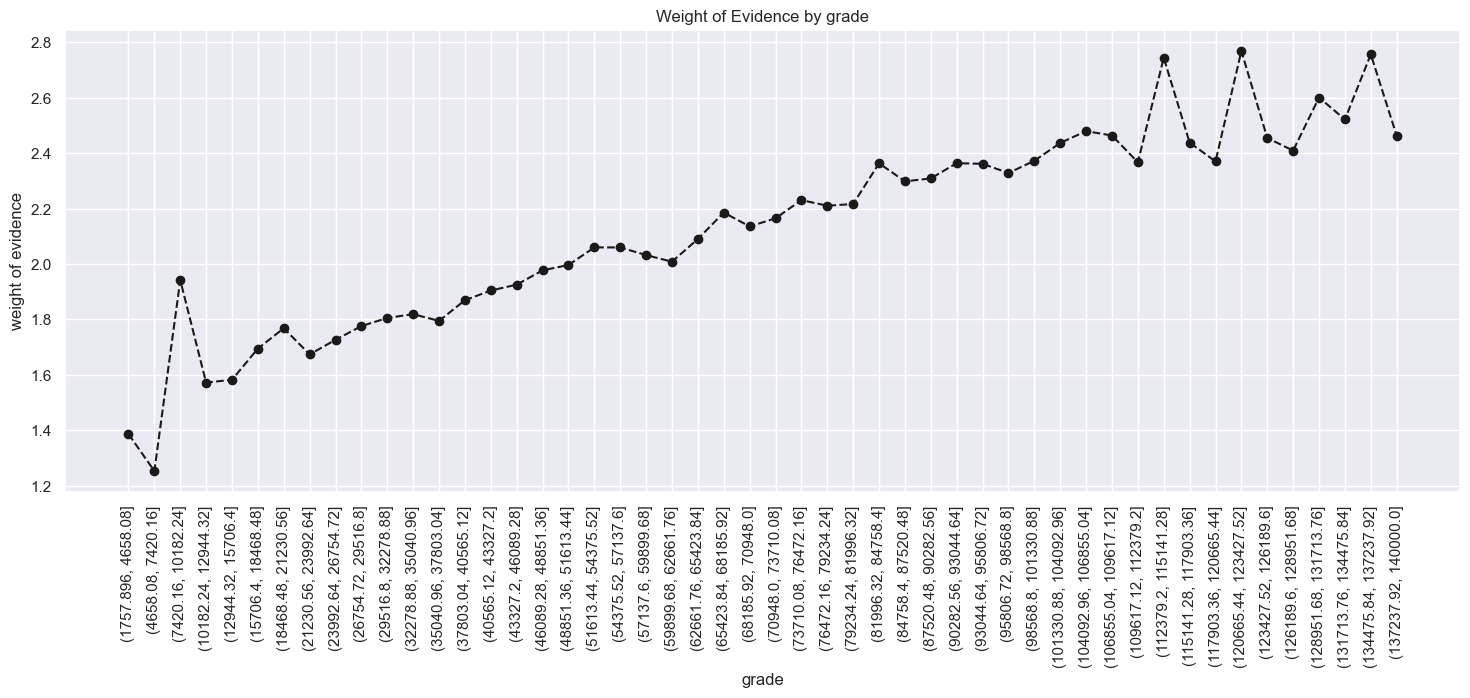

In [372]:
plot_by_woe(df_temp,90)

In [374]:
df_inputs_prepr['annual_inc:<20k'] = np.where(df_inputs_prepr['annual_inc'] < 20000, 1, 0)
df_inputs_prepr['annual_inc:20k-30k'] = np.where((df_inputs_prepr['annual_inc'] >= 20000) & (df_inputs_prepr['annual_inc'] < 30000), 1, 0)
df_inputs_prepr['annual_inc:30k-40k'] = np.where((df_inputs_prepr['annual_inc'] >= 30000) & (df_inputs_prepr['annual_inc'] < 40000), 1, 0)
df_inputs_prepr['annual_inc:40k-50k'] = np.where((df_inputs_prepr['annual_inc'] >= 40000) & (df_inputs_prepr['annual_inc'] < 50000), 1, 0)
df_inputs_prepr['annual_inc:50k-60k'] = np.where((df_inputs_prepr['annual_inc'] >= 50000) & (df_inputs_prepr['annual_inc'] < 60000), 1, 0)
df_inputs_prepr['annual_inc:60k-70k'] = np.where((df_inputs_prepr['annual_inc'] >= 60000) & (df_inputs_prepr['annual_inc'] < 70000), 1, 0)
df_inputs_prepr['annual_inc:70k-80k'] = np.where((df_inputs_prepr['annual_inc'] >= 70000) & (df_inputs_prepr['annual_inc'] < 80000), 1, 0)
df_inputs_prepr['annual_inc:80k-90k'] = np.where((df_inputs_prepr['annual_inc'] >= 80000) & (df_inputs_prepr['annual_inc'] < 90000), 1, 0)
df_inputs_prepr['annual_inc:90k-100k'] = np.where((df_inputs_prepr['annual_inc'] >= 90000) & (df_inputs_prepr['annual_inc'] < 100000), 1, 0)
df_inputs_prepr['annual_inc:100k-120k'] = np.where((df_inputs_prepr['annual_inc'] >= 100000) & (df_inputs_prepr['annual_inc'] < 120000), 1, 0)
df_inputs_prepr['annual_inc:120k-140k'] = np.where((df_inputs_prepr['annual_inc'] >= 120000) & (df_inputs_prepr['annual_inc'] < 140000), 1, 0)
df_inputs_prepr['annual_inc:>140k'] = np.where(df_inputs_prepr['annual_inc'] >= 140000, 1, 0)


/var/folders/s8/h9l9nw0s2h32gsbkdcyn3p_80000gp/T/ipykernel_1061/1776638285.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_inputs_prepr['annual_inc:<20k'] = np.where(df_inputs_prepr['annual_inc'] < 20000, 1, 0)
/var/folders/s8/h9l9nw0s2h32gsbkdcyn3p_80000gp/T/ipykernel_1061/1776638285.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_inputs_prepr['annual_inc:20k-30k'] = np.where((df_inputs_prepr['annual_inc'] >= 20000) & (df_inputs_prepr['annual_inc'] < 30000), 1, 0)
/var/folders/s8/h9l9nw0s2h32gsbkdcyn3p_80000gp/T/i

In [378]:
df_inputs_prepr_temp=df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_delinq'])]
df_inputs_prepr_temp['mths_since_last_delinq_factor']=pd.cut(df_inputs_prepr_temp['mths_since_last_delinq'],50)
df_temp=woe_continuous(df_inputs_prepr_temp,'mths_since_last_delinq_factor',df_targets_prepr)
df_temp

/var/folders/s8/h9l9nw0s2h32gsbkdcyn3p_80000gp/T/ipykernel_1061/2411991099.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp['mths_since_last_delinq_factor']=pd.cut(df_inputs_prepr_temp['mths_since_last_delinq'],50)
/var/folders/s8/h9l9nw0s2h32gsbkdcyn3p_80000gp/T/ipykernel_1061/625061358.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0],as_index = False)[df.columns.values[1]].count(),
/var/folders/s8/h9l9nw0s2h32gsbkdcyn3p_80000gp/T/ipykernel_1061/625061358.py:8: FutureWarning: The def

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.188, 3.76]",4961,0.872203,0.030591,4327.0,634.0,0.029899,0.004381,1.920581,NaN,NaN,inf
1,"(3.76, 7.52]",10491,0.887046,0.064690,9306.0,1185.0,0.064303,0.008188,2.060917,0.014843,0.140336,inf
2,"(7.52, 11.28]",12486,0.892119,0.076992,11139.0,1347.0,0.076969,0.009308,2.112573,0.005073,0.051656,inf
3,"(11.28, 15.04]",12430,0.889059,0.076647,11051.0,1379.0,0.076361,0.009529,2.081162,0.003060,0.031410,inf
4,"(15.04, 18.8]",8739,0.894382,0.053887,7816.0,923.0,0.054007,0.006378,2.136299,0.005323,0.055137,inf
5,"(18.8, 22.56]",10909,0.892474,0.067268,9736.0,1173.0,0.067274,0.008105,2.116266,0.001907,0.020033,inf
6,"(22.56, 26.32]",10201,0.896677,0.062902,9147.0,1054.0,0.063204,0.007283,2.160834,0.004203,0.044568,inf
7,"(26.32, 30.08]",9899,0.894838,0.061040,8858.0,1041.0,0.061207,0.007193,2.141139,0.001839,0.019694,inf
8,"(30.08, 33.84]",7122,0.901853,0.043916,6423.0,699.0,0.044382,0.004830,2.217990,0.007016,0.076851,inf
9,"(33.84, 37.6]",9173,0.896435,0.056563,8223.0,950.0,0.056820,0.006564,2.158228,0.005418,0.059761,inf


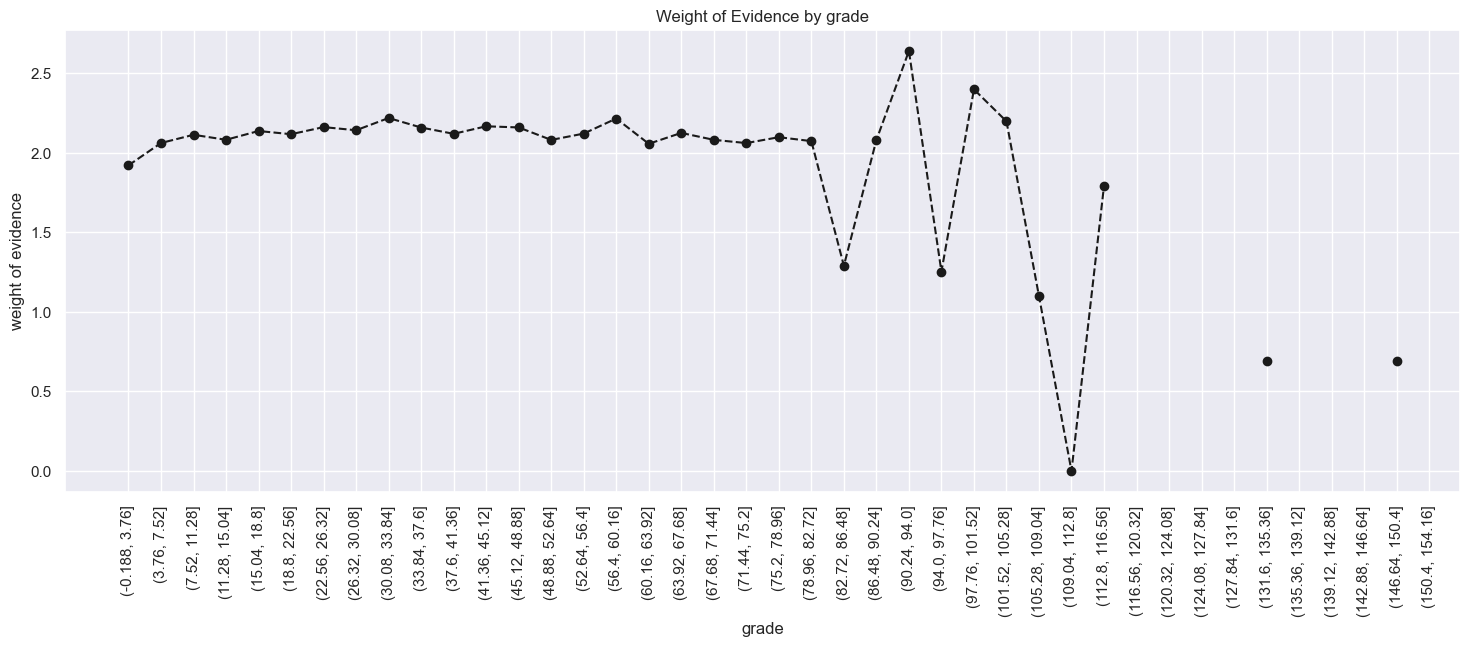

In [380]:
plot_by_woe(df_temp,90)

In [382]:
df_inputs_prepr['mths_since_last_delinq:Missing'] = np.where(df_inputs_prepr['mths_since_last_delinq'].isnull(), 1, 0)
df_inputs_prepr['mths_since_last_delinq:0-3'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 0) & (df_inputs_prepr['mths_since_last_delinq'] <= 3), 1, 0)
df_inputs_prepr['mths_since_last_delinq:4-30'] = np.where((df_inputs_prepr['mths_since_last_delinq'] > 3) & (df_inputs_prepr['mths_since_last_delinq'] <= 30), 1, 0)
df_inputs_prepr['mths_since_last_delinq:31-56'] = np.where((df_inputs_prepr['mths_since_last_delinq'] > 30) & (df_inputs_prepr['mths_since_last_delinq'] <= 56), 1, 0)
df_inputs_prepr['mths_since_last_delinq:>=57'] = np.where(df_inputs_prepr['mths_since_last_delinq'] >= 57, 1, 0)


/var/folders/s8/h9l9nw0s2h32gsbkdcyn3p_80000gp/T/ipykernel_1061/103627256.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_inputs_prepr['mths_since_last_delinq:Missing'] = np.where(df_inputs_prepr['mths_since_last_delinq'].isnull(), 1, 0)
/var/folders/s8/h9l9nw0s2h32gsbkdcyn3p_80000gp/T/ipykernel_1061/103627256.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_inputs_prepr['mths_since_last_delinq:0-3'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 0) & (df_inputs_prepr['mths_since_last_delinq'] <= 3), 1, 0)

In [384]:
df_inputs_prepr['dti_factor']=pd.cut(df_inputs_prepr['dti'],50)

/var/folders/s8/h9l9nw0s2h32gsbkdcyn3p_80000gp/T/ipykernel_1061/1589267049.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_inputs_prepr['dti_factor']=pd.cut(df_inputs_prepr['dti'],50)


In [388]:
df_temp=woe_continuous(df_inputs_prepr,'dti_factor',df_targets_prepr)
df_temp

/var/folders/s8/h9l9nw0s2h32gsbkdcyn3p_80000gp/T/ipykernel_1061/625061358.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0],as_index = False)[df.columns.values[1]].count(),
/var/folders/s8/h9l9nw0s2h32gsbkdcyn3p_80000gp/T/ipykernel_1061/625061358.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0],as_index = False)[df.columns.values[1]].mean()],axis=1)


,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.04, 0.8]",1462,0.898085,0.004181,1313.0,149.0,0.004215,0.000478,2.176124,NaN,NaN,0.744195
1,"(0.8, 1.6]",1814,0.895810,0.005187,1625.0,189.0,0.005217,0.000607,2.151516,0.002274,0.024607,0.744195
2,"(1.6, 2.399]",2369,0.911355,0.006774,2159.0,210.0,0.006931,0.000674,2.330293,0.015545,0.178777,0.744195
3,"(2.399, 3.199]",3074,0.909564,0.008790,2796.0,278.0,0.008976,0.000892,2.308324,0.001791,0.021969,0.744195
4,"(3.199, 3.999]",3867,0.905870,0.011058,3503.0,364.0,0.011246,0.001169,2.264221,0.003694,0.044103,0.744195
5,"(3.999, 4.799]",4724,0.916173,0.013508,4328.0,396.0,0.013894,0.001271,2.391447,0.010303,0.127225,0.744195
6,"(4.799, 5.599]",5626,0.910416,0.016087,5122.0,504.0,0.016443,0.001618,2.318724,0.005757,0.072723,0.744195
7,"(5.599, 6.398]",6351,0.915131,0.018161,5812.0,539.0,0.018658,0.001730,2.377964,0.004716,0.059240,0.744195
8,"(6.398, 7.198]",7216,0.912971,0.020634,6588.0,628.0,0.021150,0.002016,2.350465,0.002160,0.027500,0.744195
9,"(7.198, 7.998]",8198,0.915589,0.023442,7506.0,692.0,0.024097,0.002222,2.383872,0.002618,0.033407,0.744195


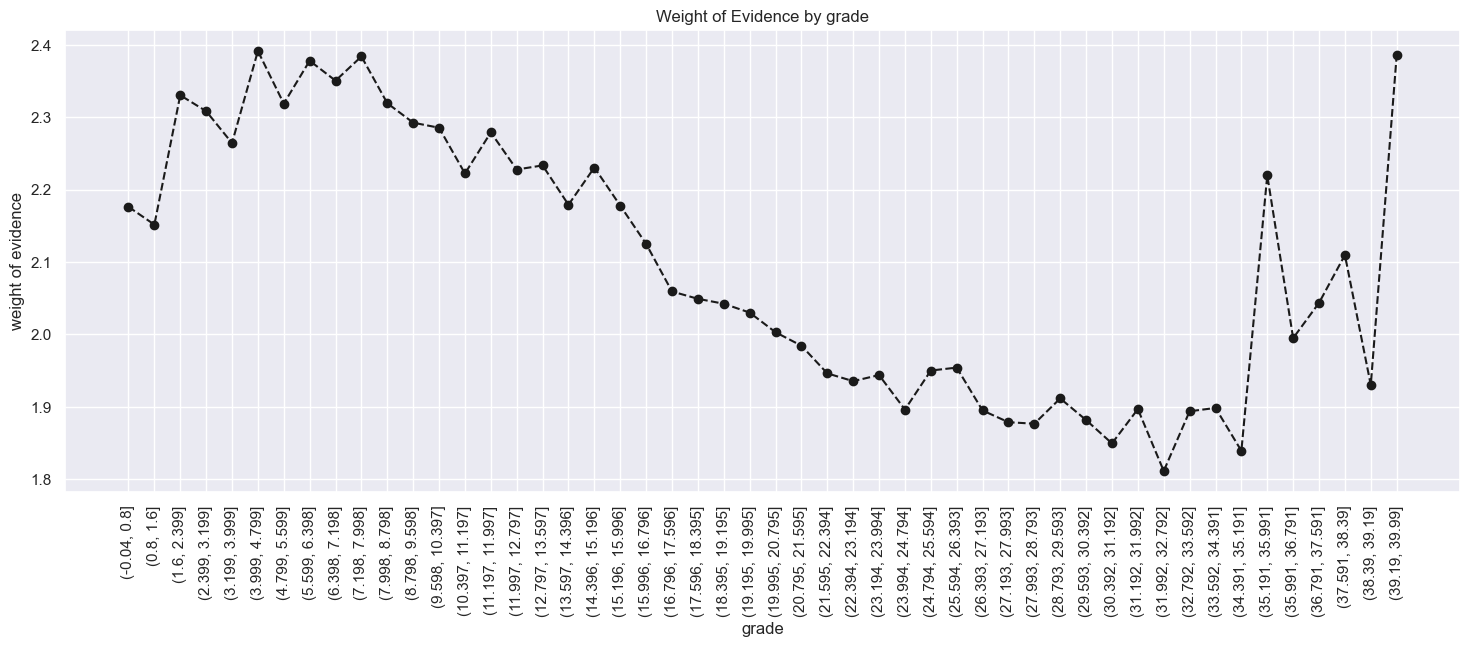

In [390]:
plot_by_woe(df_temp,90)

In [392]:
df_inputs_prepr['dti:<5'] = np.where(df_inputs_prepr['dti'] < 5, 1, 0)
df_inputs_prepr['dti:5-10'] = np.where((df_inputs_prepr['dti'] >= 5) & (df_inputs_prepr['dti'] < 10), 1, 0)
df_inputs_prepr['dti:10-15'] = np.where((df_inputs_prepr['dti'] >= 10) & (df_inputs_prepr['dti'] < 15), 1, 0)
df_inputs_prepr['dti:15-20'] = np.where((df_inputs_prepr['dti'] >= 15) & (df_inputs_prepr['dti'] < 20), 1, 0)
df_inputs_prepr['dti:20-25'] = np.where((df_inputs_prepr['dti'] >= 20) & (df_inputs_prepr['dti'] < 25), 1, 0)
df_inputs_prepr['dti:25-30'] = np.where((df_inputs_prepr['dti'] >= 25) & (df_inputs_prepr['dti'] < 30), 1, 0)
df_inputs_prepr['dti:30-35'] = np.where((df_inputs_prepr['dti'] >= 30) & (df_inputs_prepr['dti'] < 35), 1, 0)
df_inputs_prepr['dti:35-40'] = np.where((df_inputs_prepr['dti'] >= 35) & (df_inputs_prepr['dti'] < 40), 1, 0)
df_inputs_prepr['dti:>40'] = np.where(df_inputs_prepr['dti'] >= 40, 1, 0)


/var/folders/s8/h9l9nw0s2h32gsbkdcyn3p_80000gp/T/ipykernel_1061/1570286377.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_inputs_prepr['dti:<5'] = np.where(df_inputs_prepr['dti'] < 5, 1, 0)
/var/folders/s8/h9l9nw0s2h32gsbkdcyn3p_80000gp/T/ipykernel_1061/1570286377.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_inputs_prepr['dti:5-10'] = np.where((df_inputs_prepr['dti'] >= 5) & (df_inputs_prepr['dti'] < 10), 1, 0)
/var/folders/s8/h9l9nw0s2h32gsbkdcyn3p_80000gp/T/ipykernel_1061/1570286377.py:5: PerformanceWarning: 

In [394]:
df_inputs_prepr_temp=df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_record'])]
df_inputs_prepr_temp['mths_since_last_record']=pd.cut(df_inputs_prepr_temp['mths_since_last_record'],50)

/var/folders/s8/h9l9nw0s2h32gsbkdcyn3p_80000gp/T/ipykernel_1061/3505199854.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp['mths_since_last_record']=pd.cut(df_inputs_prepr_temp['mths_since_last_record'],50)


In [396]:
df_temp=woe_continuous(df_inputs_prepr_temp,'mths_since_last_record',df_targets_prepr)
df_temp


/var/folders/s8/h9l9nw0s2h32gsbkdcyn3p_80000gp/T/ipykernel_1061/625061358.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = pd.concat([df.groupby(df.columns.values[0],as_index = False)[df.columns.values[1]].count(),
/var/folders/s8/h9l9nw0s2h32gsbkdcyn3p_80000gp/T/ipykernel_1061/625061358.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df.columns.values[0],as_index = False)[df.columns.values[1]].mean()],axis=1)


,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.121, 2.42]",1021,0.768854,0.021755,785.0,236.0,0.018735,0.005632,1.201852,NaN,NaN,0.750425
1,"(2.42, 4.84]",70,0.885714,0.001492,62.0,8.0,0.001480,0.000191,2.047693,0.116860,0.845841,0.750425
2,"(4.84, 7.26]",150,0.920000,0.003196,138.0,12.0,0.003293,0.000286,2.442347,0.034286,0.394654,0.750425
3,"(7.26, 9.68]",144,0.909722,0.003068,131.0,13.0,0.003126,0.000310,2.310248,0.010278,0.132099,0.750425
4,"(9.68, 12.1]",275,0.905455,0.005860,249.0,26.0,0.005943,0.000621,2.259356,0.004268,0.050892,0.750425
5,"(12.1, 14.52]",192,0.916667,0.004091,176.0,16.0,0.004200,0.000382,2.397895,0.011212,0.138539,0.750425
6,"(14.52, 16.94]",192,0.932292,0.004091,179.0,13.0,0.004272,0.000310,2.622436,0.015625,0.224541,0.750425
7,"(16.94, 19.36]",319,0.909091,0.006797,290.0,29.0,0.006921,0.000692,2.302585,0.023201,0.319851,0.750425
8,"(19.36, 21.78]",263,0.935361,0.005604,246.0,17.0,0.005871,0.000406,2.672118,0.026270,0.369533,0.750425
9,"(21.78, 24.2]",429,0.897436,0.009141,385.0,44.0,0.009188,0.001050,2.169054,0.037925,0.503064,0.750425


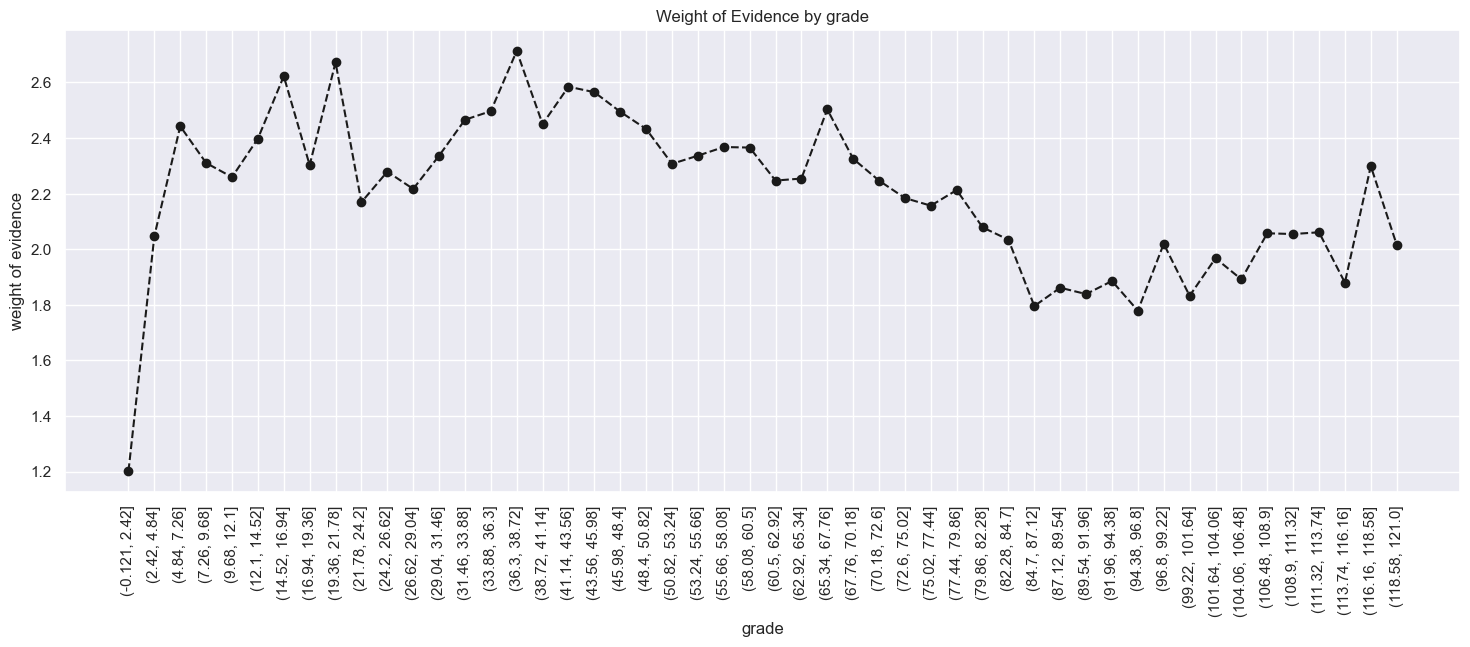

In [398]:
plot_by_woe(df_temp,90)

In [400]:
df_inputs_prepr['mths_since_last_record:Missing'] = np.where(df_inputs_prepr['mths_since_last_record'].isnull(), 1, 0)
df_inputs_prepr['mths_since_last_record:0-90'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 0) & (df_inputs_prepr['mths_since_last_record'] <= 90), 1, 0)
df_inputs_prepr['mths_since_last_record:90-120'] = np.where((df_inputs_prepr['mths_since_last_record'] > 90) & (df_inputs_prepr['mths_since_last_record'] <= 120), 1, 0)
df_inputs_prepr['mths_since_last_record:120-127'] = np.where((df_inputs_prepr['mths_since_last_record'] > 120) & (df_inputs_prepr['mths_since_last_record'] <= 127), 1, 0)
df_inputs_prepr['mths_since_last_record:>=127'] = np.where(df_inputs_prepr['mths_since_last_record'] > 127, 1, 0)


/var/folders/s8/h9l9nw0s2h32gsbkdcyn3p_80000gp/T/ipykernel_1061/3907485255.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_inputs_prepr['mths_since_last_record:Missing'] = np.where(df_inputs_prepr['mths_since_last_record'].isnull(), 1, 0)
/var/folders/s8/h9l9nw0s2h32gsbkdcyn3p_80000gp/T/ipykernel_1061/3907485255.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_inputs_prepr['mths_since_last_record:0-90'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 0) & (df_inputs_prepr['mths_since_last_record'] <= 90), 1

In [402]:
loan_data_inputs_train= df_inputs_prepr

In [404]:
loan_data_inputs_train.shape

(349713, 339)

In [406]:
load_ds_targets_train.shape

(349713,)

In [408]:
loan_data_inputs_test= df_inputs_prepr

In [410]:
loan_data_inputs_test.shape

(349713, 339)

In [412]:
load_ds_targets_test.shape

(116572,)

In [414]:
loan_data_inputs_train.to_csv('loan_data_inputs_train.csv')
load_ds_targets_train.to_csv('loan_data_targets_train.csv')

loan_data_inputs_test.to_csv('loan_data_inputs_test.csv')
load_ds_targets_test.to_csv('loan_data_targets_test.csv')